In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Enunciado - Sobre el desafío:


¡Has profundizado bastante en Ciencia de Datos, y hoy te traemos el desafío de Machine Learning: La Esencia del Cliente - Parte 1!


** Obejtivo principal: **

*** La junta directiva de la cadena de supermercados Universal Food ha observado una estabilización en sus ventas y busca comprender cómo mejorar la relación con sus clientes, entendiendo sus hábitos de compra, para ofrecerles un servicio de mayor calidad. El objetivo es proporcionarles una experiencia de compra más personalizada, rápida y efectiva.***

**Los pasos sugeridos para solucionar este desafío, los enumeramos a continuación:**

**1. Configuración del ambiente:** En este desafío puedes continuar usando Google Colaboratory, sin embargo, recuerda que puedes utilizar el editor Python de tu preferencia. sólo asegúrate de tener Python 3.x instalado en tu computadora. También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn, etc.

**2. Obtención y transformación de los datos:** Para obtener los datos necesarios para desarrollar el proyecto, vamos a habilitar los links para la descarga. Esta base de datos está en inglés, entonces debes adaptarla para que quede en español, de modo que puedas comprender mejor tus datos.

**3. Exploración de los datos:** Con tu dataset para el análisis preparado, podrás emplear las bibliotecas Matplotlib y Seaborn para generar algunas visualizaciones que te permitan entender la composición de tu dataset, evaluar la distribución entre las variables, y realizar algunas comparaciones, entre otras operaciones.

**4. Preprocesamiento y obtención de features:** Aquí debes tomar variables categóricas y buscar algún mecanismo de codificación para que el algoritmo de clusterización pueda entender el conjunto de datos que será procesado. Adicionalmente, debes reducir la dimensionalidad de tu dataset seleccionando los atributos que mejor representan el conjunto de datos, y finalmente traer todos los datos a la misma escala mediante una estandarización de los mismos.

**5. Validación de los clusters:** Aquí pondrás a prueba todo tu potencial como científico de datos, pues vas a realizar una serie de experimentos: Vas a variar el número de clusters, evaluar su estructura, y su estabilidad aplicando diversas métricas de validación. Tras hallar la mejor configuración para tus clusters, procederás a instanciarlo.

**6. Análisis e interpretación de clusters:** Aquí es donde aplicarás todas tus competencias analíticas para describir los hallazgos en cada uno de los clusters generados, y así plantear posibles estrategias para mejorar la experiencia de los clientes.

En este proyecto queremos que sigas practicando tus nuevas habilidades con el uso de Pandas, Numpy, Matplotlib y Seaborn en junción con una de las principales bibliotecas para el Machine Learning: Scikit-Learn. Lógicamente, se requiere de una cantidad importante de tiempo y esfuerzo, así como una comprensión intermedia de Python y además de creatividad, mucha curiosidad.

Presta bastante atención a las clases y a todo el contenido habilitado para este módulo. Trata de resolver los pasos antes de acudir por ayuda… Si realmente vez que nada de esto funciona, recuerda que estaremos pendientes para auxiliarte en los canales exclusivos del Bootcamp.

Y sin más preámbulos, ¡Comencemos a trabajar!

# 2. Obtención y transformación de los datos:

## Importando Librerías:

In [3]:
# @title Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [4]:
# @title Recuperación de Data original
df = pd.read_csv('/content/drive/MyDrive/BootCamp Data Science 02_09_2023/Desafío2_La_esencia_del_cliente_1/media prediction and its cost.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [5]:
# @title Diccionarios para la traduccion de las variables del DataSet
traduccion_categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

traduccion_columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

traduccion_departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

traduccion_tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

traduccion_promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

traduccion_escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

traduccion_miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

traduccion_ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

traduccion_pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

traduccion_estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

traduccion_genero ={
    'F':'Femenino',
    'M':'Masculino'
}

traduccion_vivienda_propia={'Y':'Sí', 'N':'No'}

traduccion_ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}

traduccion_comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}

traduccion_divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

In [6]:
# @title Traduciendo los títulos de las columnas presentes en el DataSet
df1 = df.copy()
data = df1.rename(columns=traduccion_columnas) # Traduucción de las columnas
# Traducción de las variables dentro del dataset
data.categoria_alimento = data.categoria_alimento.replace(traduccion_categoria_alimento)
data.departamento = data.departamento.replace(traduccion_departamento)
data.tipo = data.tipo.replace(traduccion_tipo)
data.promocion = data.promocion.replace(traduccion_promocion)
data.escolaridad = data.escolaridad.replace(traduccion_escolaridad)
data.miembro = data.miembro.replace(traduccion_miembro)
data.ocupacion = data.ocupacion.replace(traduccion_ocupacion)
data.pais = data.pais.replace(traduccion_pais)
data.estado_civil = data.estado_civil.replace(traduccion_estado_civil)
data.genero = data.genero.replace(traduccion_genero)
data.vivienda_propia = data.vivienda_propia.replace(traduccion_vivienda_propia)
data.ingreso_anual = data.ingreso_anual.replace(traduccion_ingreso_anual)
data.comercio = data.comercio.replace(traduccion_comercio)
data.divulgacion = data.divulgacion.replace(traduccion_divulgacion)


In [7]:
pd.set_option('display.max_columns', None)
data.sample(15)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
46811,Mariscos,Mariscos,Comida,7.74,2.7864,3.0,Venta Ahorra Ya,Estados Unidos,Soltero,Femenino,1.0,Secundaria,Bronce,Profesional,Sí,3.0,120000,0.0,3.0,Curlew,2.58,6.87,3.86,0.0,1.0,4.0,Supermercado,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Periódico diario,81.79
54565,Productos de plástico,Artículos para el hogar,No comestible,9.72,4.2768,4.0,Super ahorradores de billetera,Estados Unidos,Casado,Masculino,1.0,Secundaria,Bronce,Técnico,No,2.0,40000,1.0,2.0,Denny,2.43,6.83,4.82,1.0,0.0,18.0,Supermercado,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,Entrega en el punto de venta,140.19
8826,Alimentos para picar,Alimentos para picar,Comida,13.95,4.6035,5.0,Venta de dos días,Estados Unidos,Casado,Masculino,5.0,Secundaria,Bronce,Profesional,No,3.0,100000,2.0,3.0,Nationeel,2.79,9.63,7.63,1.0,0.0,22.0,Supermercado,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Radio,91.28
42822,Alimentos para el desayuno,Alimentos congelados,Comida,10.96,4.6032,4.0,Promociones por montones,Estados Unidos,Soltero,Masculino,0.0,Primaria,Bronce,Profesional,Sí,3.0,100000,0.0,3.0,Carrington,2.74,10.30,8.30,1.0,0.0,29.0,Supermercado,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,"Periódico diario, radio, televisión",145.41
42914,Alimentos para el desayuno,Alimentos congelados,Comida,2.61,0.9135,3.0,Días de ahorro,Estados Unidos,Casado,Femenino,3.0,Maestría,Oro,Profesional,Sí,3.0,120000,3.0,3.0,Big Time,0.87,10.20,8.19,0.0,0.0,29.0,Supermercado,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Anexo del producto,83.26
20687,Especialidades,Productos frescos,Comida,2.85,0.9690,3.0,Venta de dos días,México,Soltero,Femenino,0.0,Superior,Bronce,Profesional,No,2.0,60000,0.0,2.0,Ebony,0.95,8.29,7.28,1.0,0.0,20.0,Supermercado gourmet,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,"Periódico dominical, radio, televisión",93.11
16520,Bebidas carbonatadas,Bebidas,Bebida,7.41,2.7417,3.0,Adiós bebé,Canadá,Soltero,Femenino,1.0,Secundaria,Plata,Técnico,Sí,3.0,40000,0.0,3.0,Fabulous,2.47,18.60,16.60,1.0,0.0,1.0,Supermercado de lujo,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Periódico dominical,138.18
40730,Pan,Productos horneados,Comida,10.38,3.6330,3.0,Promociones por montones,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Técnico,Sí,4.0,40000,2.0,4.0,Modell,3.46,14.70,12.60,0.0,0.0,36.0,Supermercado gourmet,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Correo masivo,96.55
5645,Vegetales,Productos frescos,Comida,3.96,1.6632,3.0,Super Ahorro,México,Casado,Masculino,3.0,Primaria,Normal,Técnico,No,1.0,20000,1.0,1.0,High Top,1.32,14.80,13.80,0.0,1.0,15.0,Supermercado mediano,Mexico City,DF,36509.0,22450.0,8435.0,5624.0,0.0,0.0,0.0,0.0,0.0,"Periódico diario, radio",101.61
22484,Eléctrico,Artículos para el hogar,No comestible,11.49,5.2854,3.0,Adelante,México,Soltero,Femenino,1.0,Primaria,Bronce,Obrero,No,1.0,40000,0.0,1.0,Denny,3.83,14.00,12.00,1.0,0.0,35.0,Supermercado de lujo,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Correo masivo,87.07


In [8]:
# @title Guardando el dataset en el drive:
data.to_csv('/content/drive/MyDrive/BootCamp Data Science 02_09_2023/Desafío2_La_esencia_del_cliente_1/prediccion_promedio_y_sus_costos_2.csv', index=False)

### -- Análisis exploratorio de los datos

In [9]:
# @title Cargando el conjunto de datos, y creando el dataFrame
# Cargamos el conjunto de datos
# El DataFrame se llama 'df'

# Lee el archivo CSV con codificación UTF-8
ruta_archivo = '/content/drive/MyDrive/BootCamp Data Science 02_09_2023/Desafío2_La_esencia_del_cliente_1/prediccion_promedio_y_sus_costos_2.csv'
dataset = pd.read_csv(ruta_archivo, encoding='utf-8')

In [10]:
dataset.sample(15)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
42076,Cerveza y vino,Bebidas alcohólicas,Bebida,5.58,2.5110,3.0,Gran promoción,Estados Unidos,Soltero,Masculino,2.0,Superior,Bronce,Profesional,Sí,2.0,140000,0.0,2.0,Pearl,1.86,10.30,8.30,0.0,0.0,11.0,Supermercado,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Entrega en el punto de venta,123.88
48400,Alimentos para el desayuno,Alimentos para el desayuno,Comida,5.79,2.5476,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,1.0,Superior,Oro,Profesional,Sí,3.0,140000,1.0,3.0,Special,1.93,16.10,15.10,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
10915,Productos lácteos,Productos lácteos,Comida,10.96,4.7128,4.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,2.0,Técnico,Bronce,Profesional,Sí,2.0,120000,0.0,2.0,Gorilla,2.74,18.20,17.20,0.0,0.0,13.0,Supermercado gourmet,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Periódico diario,101.84
34036,Productos de papel,Artículos para el hogar,No comestible,3.32,1.0292,2.0,Venta Ahorra Ya,Estados Unidos,Casado,Femenino,4.0,Primaria,Normal,Técnico,Sí,2.0,20000,0.0,2.0,High Quality,1.66,7.26,5.26,0.0,0.0,24.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Periódico dominical,139.37
59986,Revistas,Publicaciones periódicas,No comestible,3.70,1.1470,2.0,Venta de dos días,México,Soltero,Masculino,1.0,Secundaria,Bronce,Obrero,Sí,4.0,40000,0.0,4.0,Mighty Good,1.85,13.70,10.60,0.0,0.0,6.0,Supermercado de lujo,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Radio,94.79
8707,Alimentos para picar,Alimentos para picar,Comida,6.00,2.4600,5.0,Recortadores de dólares,Estados Unidos,Soltero,Femenino,3.0,Primaria,Normal,Obrero,No,2.0,20000,0.0,2.0,Fast,1.20,15.00,12.00,0.0,1.0,5.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,"Periódico dominical, radio",136.74
57147,Analgésicos,Salud e higiene,No comestible,12.72,5.4696,4.0,Elige tus ahorros,México,Casado,Femenino,1.0,Secundaria,Normal,Obrero,Sí,3.0,40000,0.0,3.0,Bird Call,3.18,20.50,17.50,1.0,0.0,25.0,Supermercado de lujo,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,"Periódico dominical, radio, televisión",141.38
12392,Suministros de limpieza,Artículos para el hogar,No comestible,5.90,2.1240,2.0,Recortadores de dólares,Estados Unidos,Casado,Femenino,0.0,Secundaria,Bronce,Obrero,Sí,3.0,40000,0.0,3.0,Red Wing,2.95,15.20,13.10,0.0,0.0,35.0,Supermercado,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",135.50
47252,Dulces,Snacks,Comida,10.80,3.3480,5.0,Super Ahorro,Canadá,Soltero,Masculino,4.0,Primaria,Normal,Obrero,Sí,2.0,20000,0.0,2.0,Atomic,2.16,17.50,15.50,0.0,1.0,32.0,Supermercado de lujo,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Panfletos,144.54
21410,Carne,Charcutería,Comida,2.16,0.9504,3.0,Venta Ahorra Ya,Estados Unidos,Soltero,Masculino,1.0,Técnico,Plata,Obrero,Sí,2.0,40000,0.0,2.0,Cutting Edge,0.72,19.60,17.60,1.0,1.0,24.0,Supermercado,Spokane,WA,30268.0,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,"Periódico diario, radio, televisión",89.37


## Objetivo:

  ### El objetivo es proporcionarles una experiencia de compra más personalizada, rápida y efectiva.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

# 3. Exploración de los datos:

## Columnas y descripción:

Algunas de las variables que podrían ser de vital importancia para obtener una experiencia de compra más personalizada, rápida y efectiva podrían incluir:

1. **Categoría de Alimento (categoria_alimento):**
   - Permite personalizar recomendaciones y ofertas según las preferencias de alimentos de los clientes.

2. **Tipo de Producto (tipo):**
   - Ayuda a segmentar los productos y personalizar la experiencia en función de las categorías específicas.

3. **Promoción (promocion):**
   - Analizar la participación en promociones puede ser útil para ofrecer descuentos personalizados.

4. **Estado Civil (estado_civil):**
   - Proporciona información demográfica que puede ser relevante para personalizar ofertas y servicios.

5. **Número de Hijos (total_de_hijos, numero_hijos):**
   - Permite personalizar ofertas y productos según el tamaño de la familia del cliente.

6. **Escolaridad (escolaridad):**
   - Puede ser relevante para adaptar el tono del contenido y las recomendaciones según el nivel educativo.

7. **Ocupación (ocupacion):**
   - Proporciona información sobre la ocupación del cliente, lo que podría influir en sus preferencias de compra.

8. **Ingreso Anual (ingreso_anual):**
   - Permite personalizar ofertas y productos en función de la capacidad financiera del cliente.

9. **Género (genero):**
   - Proporciona información demográfica que puede influir en las preferencias de compra y en la personalización de productos.

10. **Ciudad (ciudad), Estado (estado):**
    - Permite adaptar ofertas y servicios según la ubicación geográfica del cliente.

11. **Comercio (comercio):**
    - Puede ser útil para personalizar la experiencia según el tipo de comercio en el que el cliente realiza compras.

12. **Historial de Compras (ventas_tienda, costo_tienda, ventas_unitarias):**
    - Proporciona información detallada sobre el comportamiento de compra, lo que puede ser clave para personalizar ofertas.

13. **Pies Cuadrados de la Tienda (pies_cuadrados_tienda, pies_cuadrados_comestibles, pies_cuadrados_congelados, pies_cuadrados_carne):**
    - Puede influir en la disposición de la tienda y en la presentación de productos.

14. **Divulgación (divulgacion):**
    - Proporciona información sobre cómo los clientes conocen los productos, lo que puede ser útil para estrategias de marketing personalizadas.

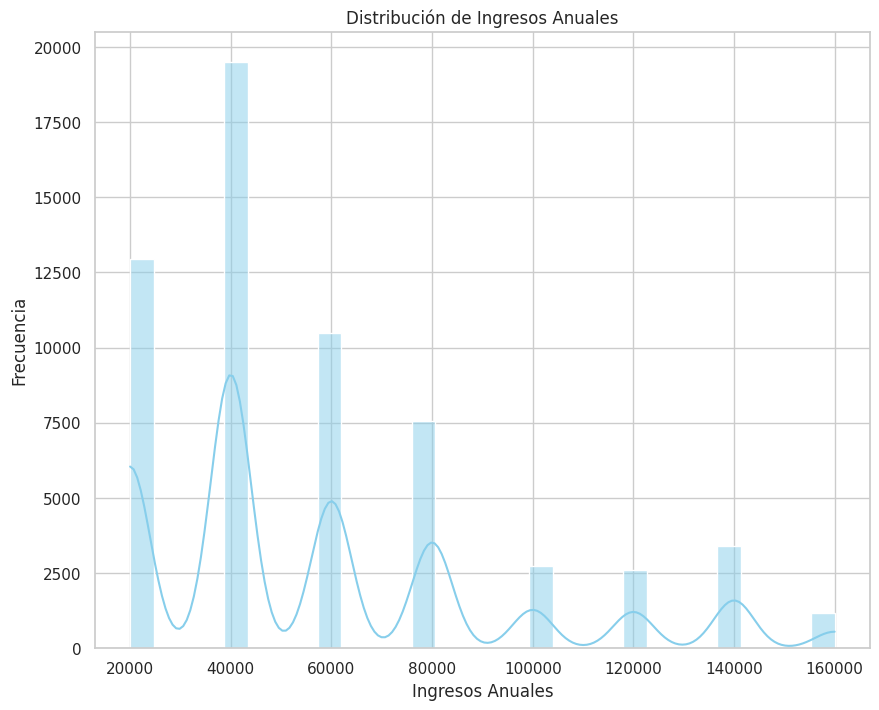

In [12]:
# @title Gráfico 1: Histograma sobre el ingreso anual del cliente
# Establecer el estilo de Seaborn para un gráfico más atractivo
sns.set(style="whitegrid")

# 1. Histograma de Ingresos Anuales
plt.figure(figsize=(10, 8))
sns.histplot(dataset['ingreso_anual'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Ingresos Anuales')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Frecuencia')
plt.show()

Observaciones e Hipótesis 1 (Histograma de Ingresos Anuales):

* Observación: La distribución de ingresos anuales parece ser asimétrica derecha, lo que sugiere que la mayoría de los clientes tienen ingresos relativamente bajos o moderados.

* Hipótesis: Podría haber oportunidades para estrategias de precios segmentadas o promociones dirigidas a diferentes segmentos de ingresos.

In [13]:
# @title Gráfico 2: Análisis cuantitativo sobre el comportamiento del cliente

def plot_porcentajes(estado, datos):
  plt.figure(figsize=(20,8))
  grafico2 = sns.countplot(x=estado, data=datos, orient='h')
  grafico2.set_ylabel('Conteo', fontsize=17)

  sizes = []

  for p in grafico2.patches:
    height = p.get_height()
    sizes.append(height)
    grafico2.text(p.get_x() + p.get_width()/1.6, height + 200, f'{round(height/len(datos)*100,2)}%', ha='center', va='bottom', fontsize=12)
    grafico2.set_ylim(0,max(sizes)*1.1)

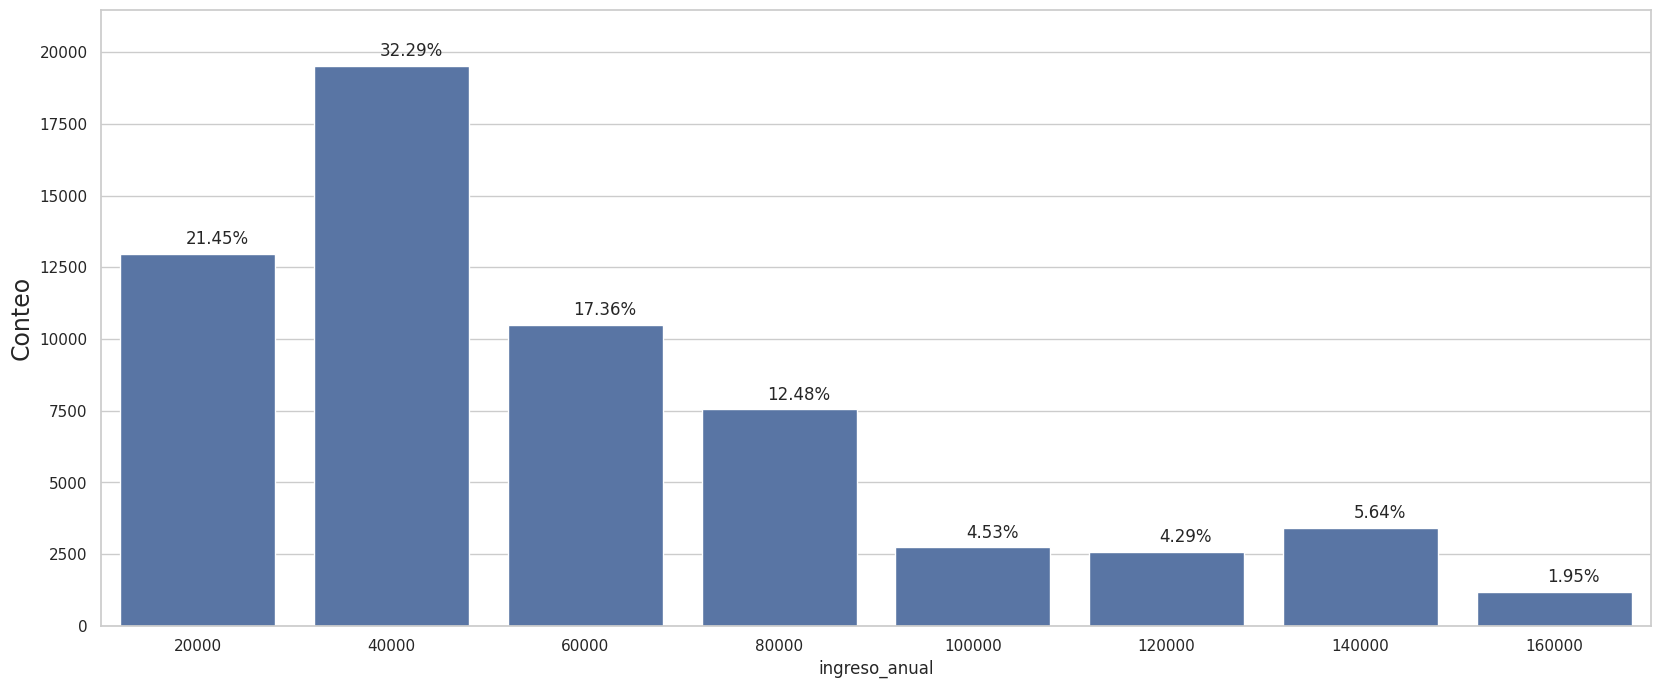

In [14]:
# 2. Histograma de Ingreso Anual del cliente
plot_porcentajes('ingreso_anual', dataset)

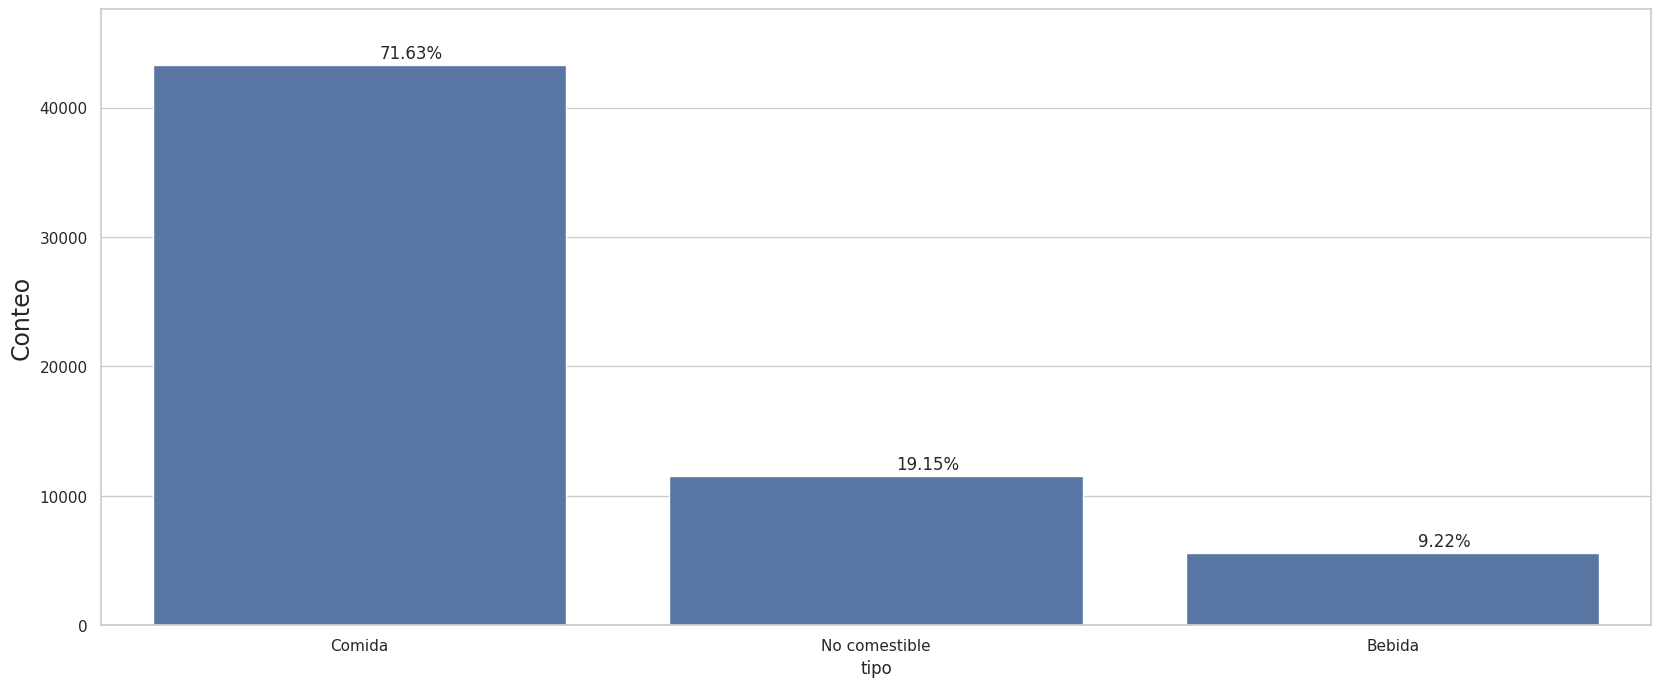

In [15]:
# 3. Histograma de Ingreso Anual del cliente
plot_porcentajes('tipo', dataset)

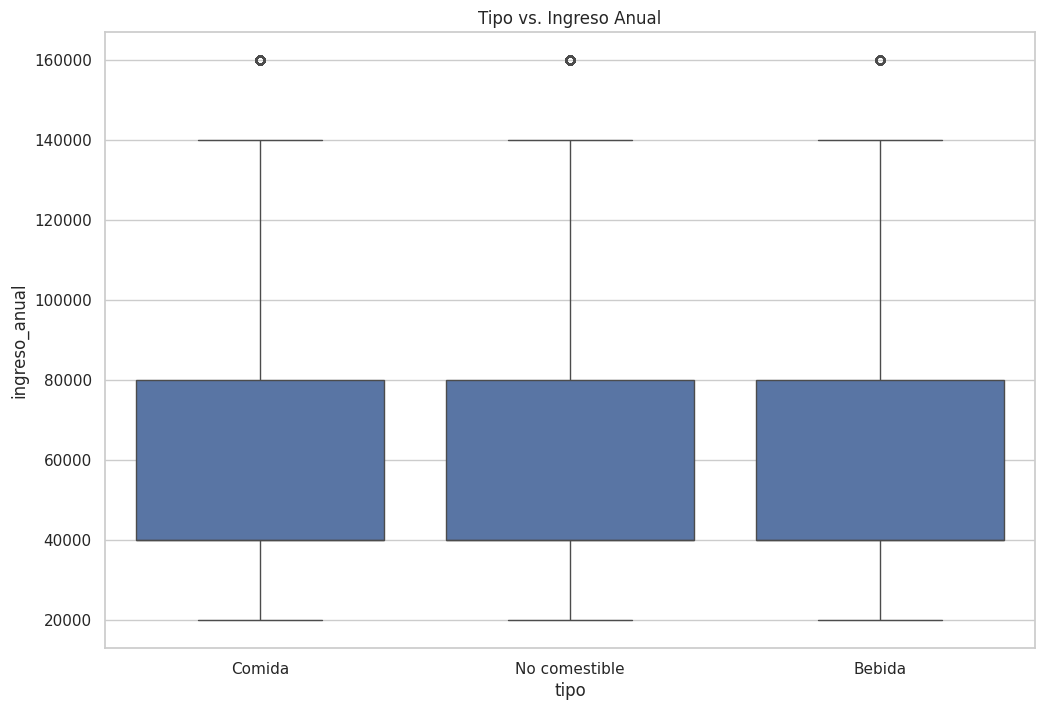

In [16]:
# 4. Boxplot de comparación entre las variables "tipo" y "ingreso_anual"
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='ingreso_anual', data=dataset)
plt.title('Tipo vs. Ingreso Anual')
plt.show()

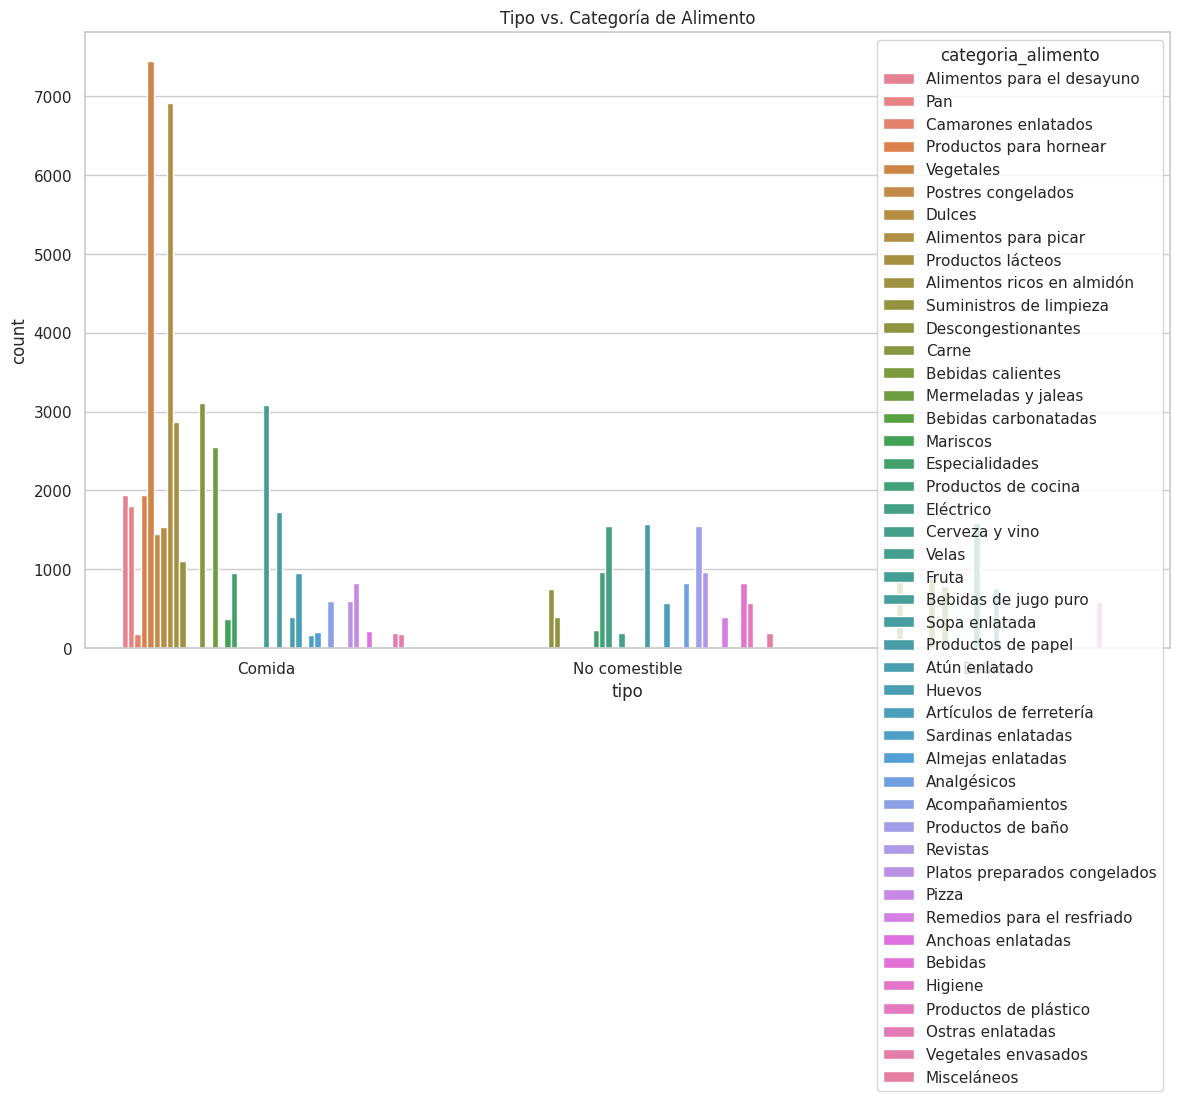

In [17]:
# 5. Countplot de comparación entre las variables "tipo" y "categoria_alimento"
plt.figure(figsize=(14, 8))
sns.countplot(x='tipo', hue='categoria_alimento', data=dataset)
plt.title('Tipo vs. Categoría de Alimento')
plt.show()

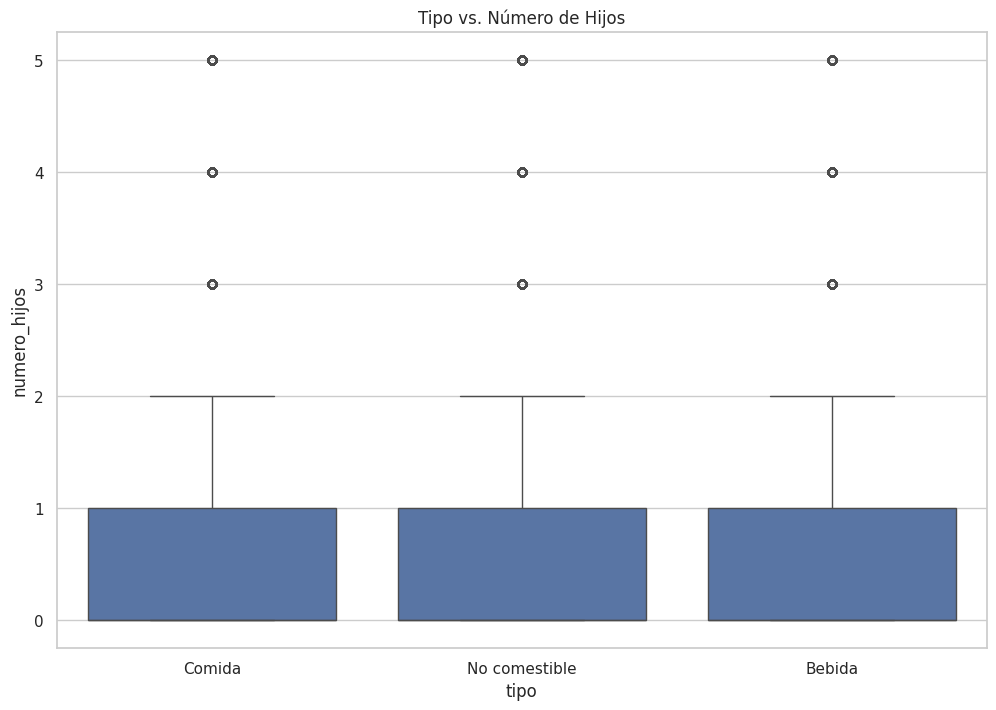

In [18]:
# 6. Boxplot de comparación entre las variables "tipo" y "numero_hijos"
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='numero_hijos', data=dataset)
plt.title('Tipo vs. Número de Hijos')
plt.show()

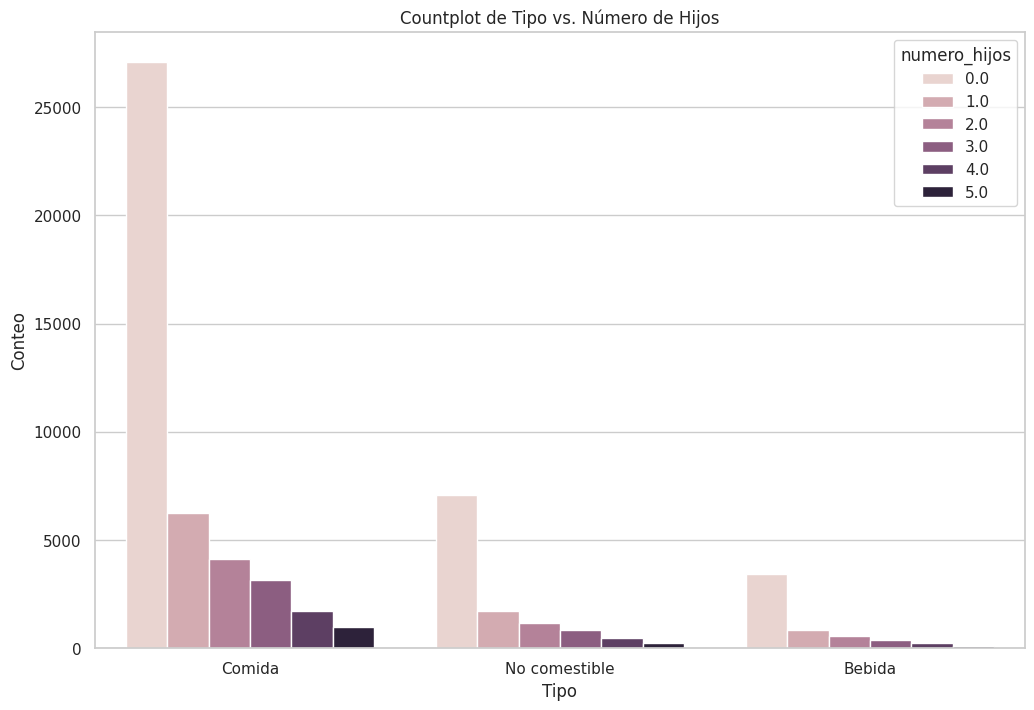

In [19]:
# 7. Countplot de comparación entre las variables "tipo" y "numero_hijos"
plt.figure(figsize=(12, 8))
sns.countplot(x='tipo', hue='numero_hijos', data=dataset)
plt.title('Countplot de Tipo vs. Número de Hijos')
plt.xlabel('Tipo')
plt.ylabel('Conteo')
plt.show()

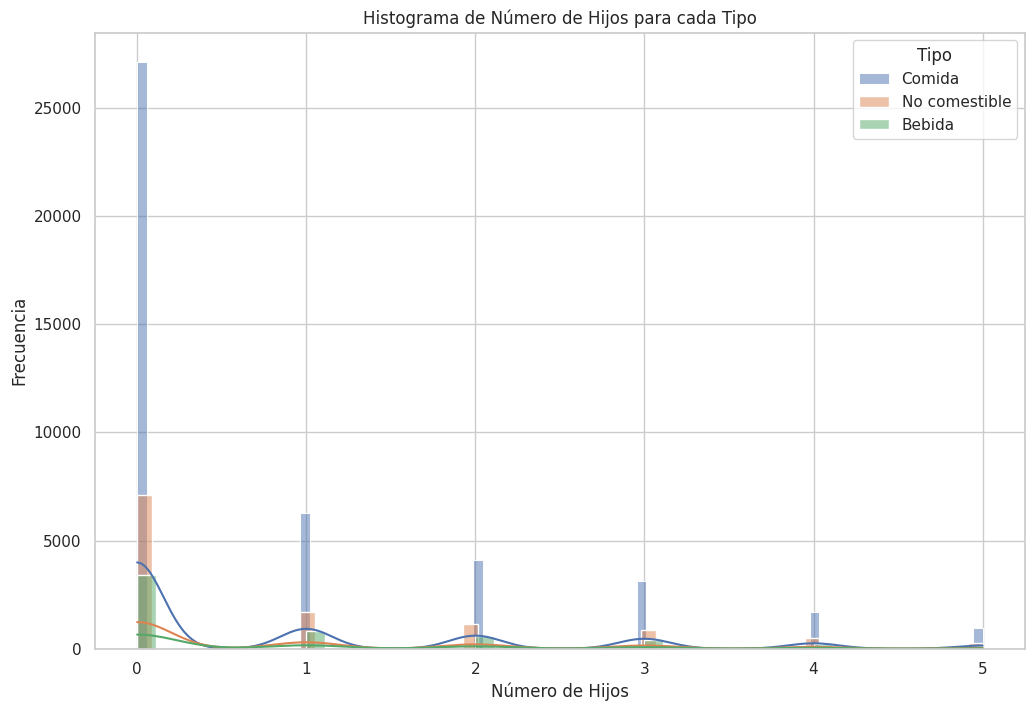

In [20]:
# 8. Histograma de frecuencia de compra, comparación entre las variables "tipo" y "numero_hijos"
plt.figure(figsize=(12, 8))
for tipo in dataset['tipo'].unique():
    sns.histplot(dataset[dataset['tipo'] == tipo]['numero_hijos'], kde=True, label=tipo, alpha=0.5)

plt.title('Histograma de Número de Hijos para cada Tipo')
plt.xlabel('Número de Hijos')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo')
plt.show()

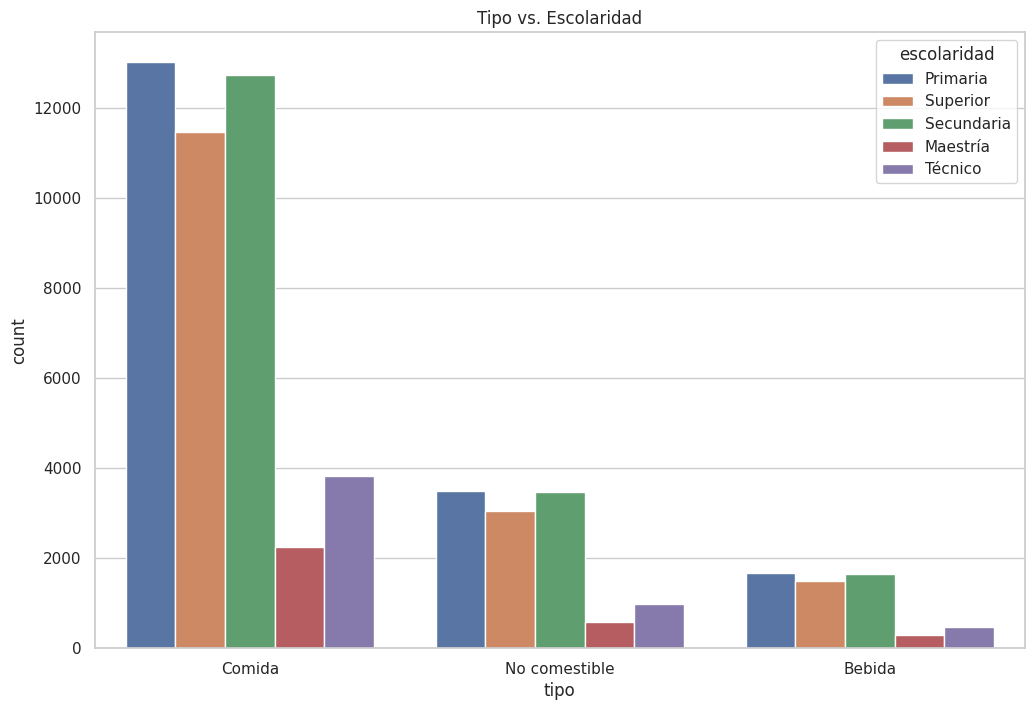

In [21]:
# 9. Countplot de comparación entre las variables "tipo" y "escolaridad"
plt.figure(figsize=(12, 8))
sns.countplot(x='tipo', hue='escolaridad', data=dataset)
plt.title('Tipo vs. Escolaridad')
plt.show()

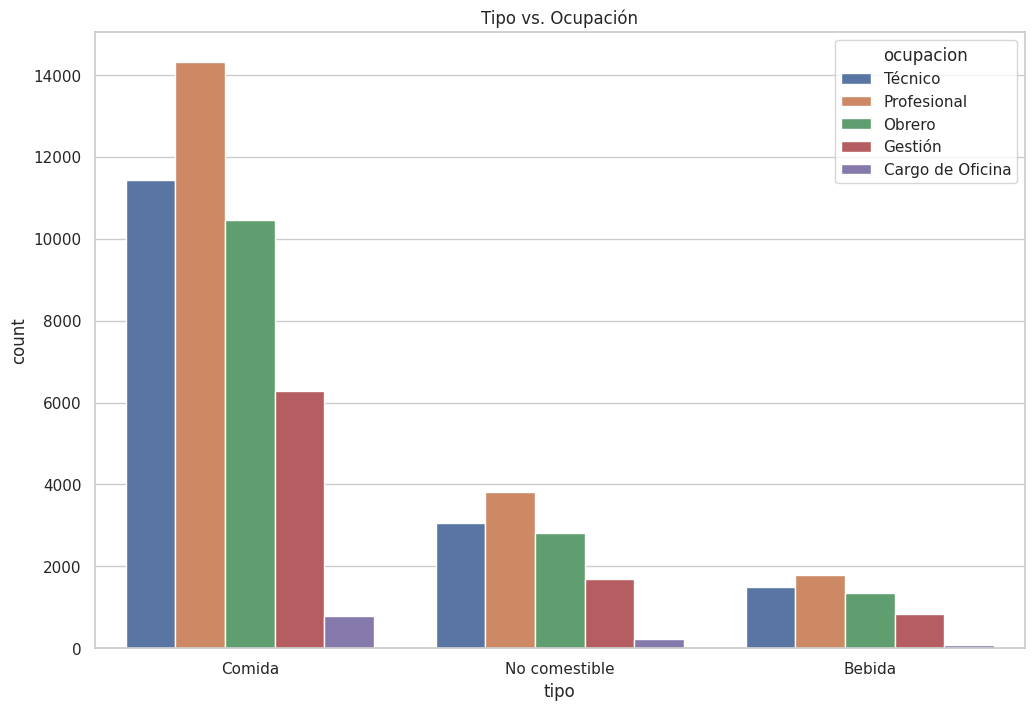

In [22]:
# 10. Countplot de comparación entre las variables "tipo" y "ocupación"
plt.figure(figsize=(12, 8))
sns.countplot(x='tipo', hue='ocupacion', data=dataset)
plt.title('Tipo vs. Ocupación')
plt.show()

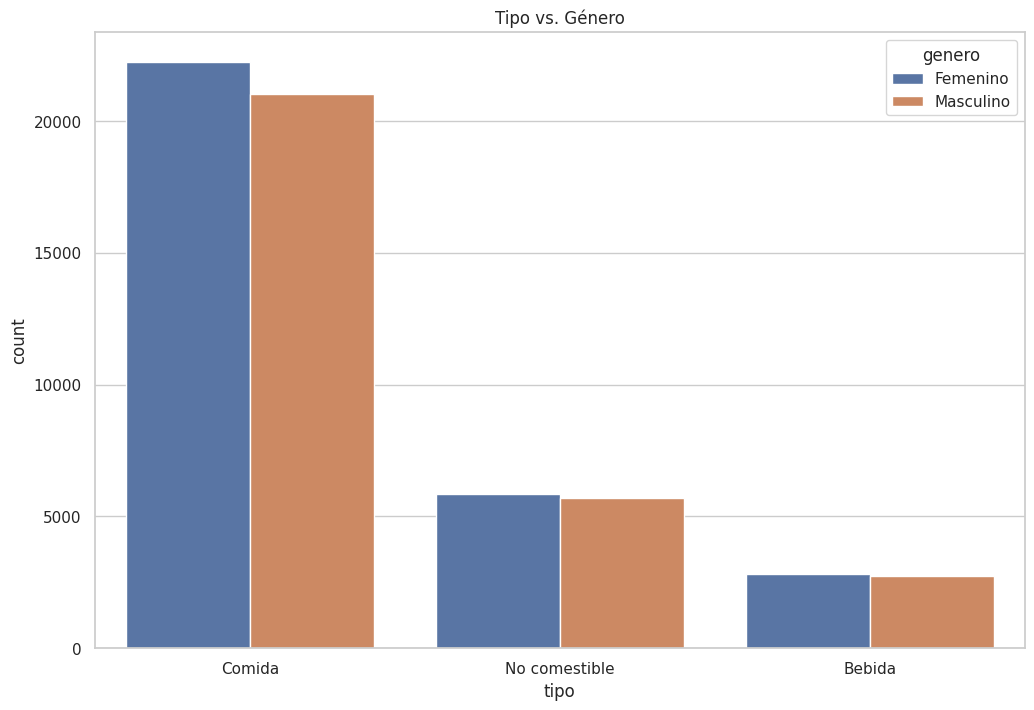

In [23]:
# 11. Countplot de comparación entre las variables "tipo" y "género"
plt.figure(figsize=(12, 8))
sns.countplot(x='tipo', hue='genero', data=dataset)
plt.title('Tipo vs. Género')
plt.show()

### Análisis de variables individuales

<ipython-input-24-4553a24e5bcf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ingreso_anual', data=dataset, palette='pastel')


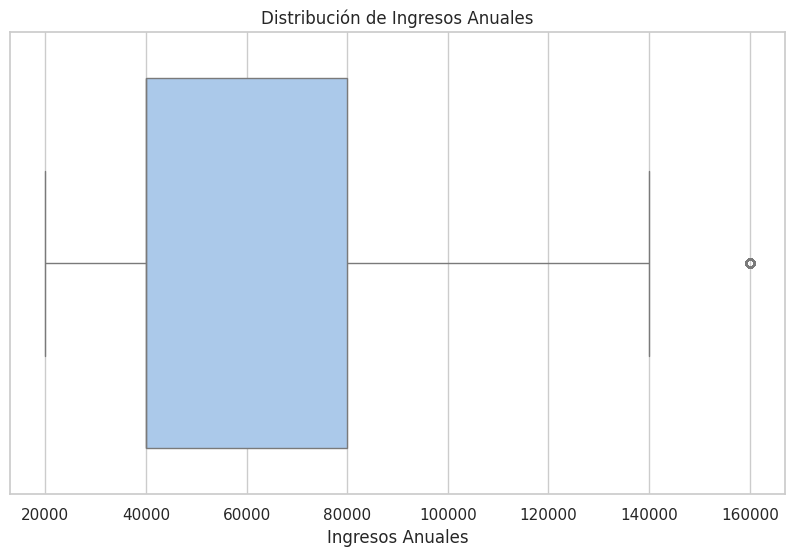

In [24]:
# 1 Gráfico de Boxplot para Ingresos Anuales
plt.figure(figsize=(10, 6))
sns.boxplot(x='ingreso_anual', data=dataset, palette='pastel')
plt.title('Distribución de Ingresos Anuales')
plt.xlabel('Ingresos Anuales')
plt.show()

Observaciones e Hipótesis 2 (Gráfico de Boxplot para Ingresos Anuales):

* Observación: La mediana y dispersión de ingresos anuales se muestran en el boxplot.

* Hipótesis: Existen clientes con ingresos atípicamente altos o bajos comprendidos en un rango (40000$ y 80000$) con una media de 60000$, lo que puede indicar oportunidades de segmentación.

<ipython-input-25-6048ba1c3cc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genero', data=dataset, palette='viridis')


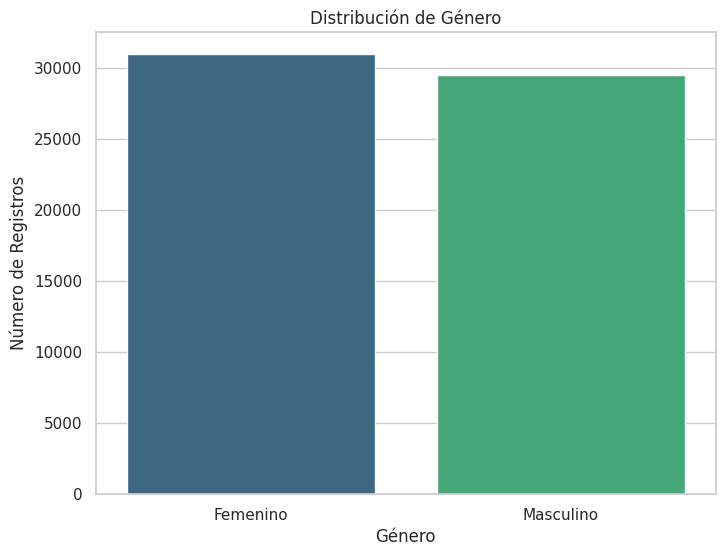

In [25]:
# 2 Gráfico de Barras para Género
plt.figure(figsize=(8, 6))
sns.countplot(x='genero', data=dataset, palette='viridis')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Número de Registros')
plt.show()

Observaciones e Hipótesis 3 (Gráfico de Barras para Género):

* Observación: Hay una distribución de género desbalanceada.

* Hipótesis: Estrategias de marketing pueden ser adaptadas según el género predominante o diversidad de género.

<ipython-input-26-8bb38e31db6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genero', y='ingreso_anual', data=dataset, palette='pastel')


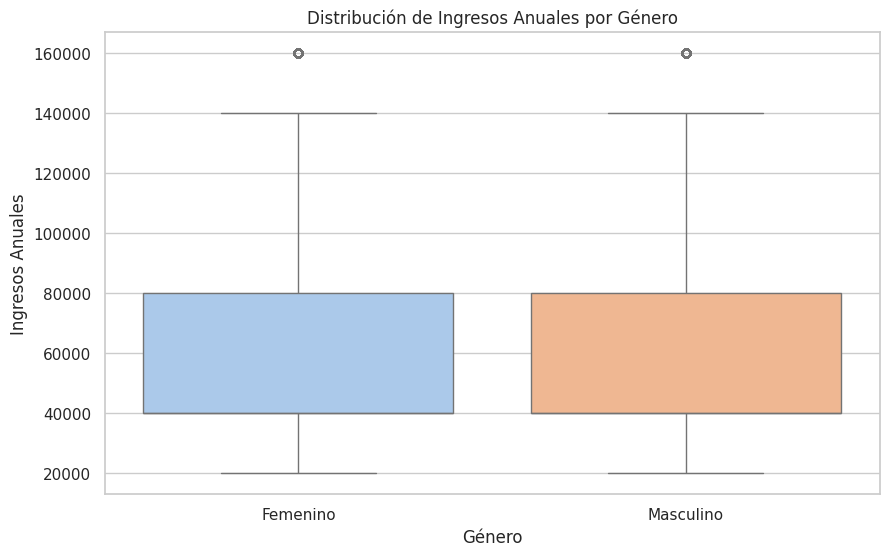

In [26]:
# 3. Gráfico de Boxplot para Ingresos Anuales por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='genero', y='ingreso_anual', data=dataset, palette='pastel')
plt.title('Distribución de Ingresos Anuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Anuales')
plt.show()

Observaciones e Hipótesis 4 (Gráfico de Boxplot para Ingresos Anuales por Género):

* Observación: La mediana de los ingresos anuales es similar entre los géneros.

* Hipótesis: Existe paridad de ingresos entre géneros. Esto podría ser un indicativo de oportunidades de marketing con tecnicas similares o específicas para cada género.

<ipython-input-27-3e837e6df0ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='categoria_alimento', data=dataset, palette='viridis')


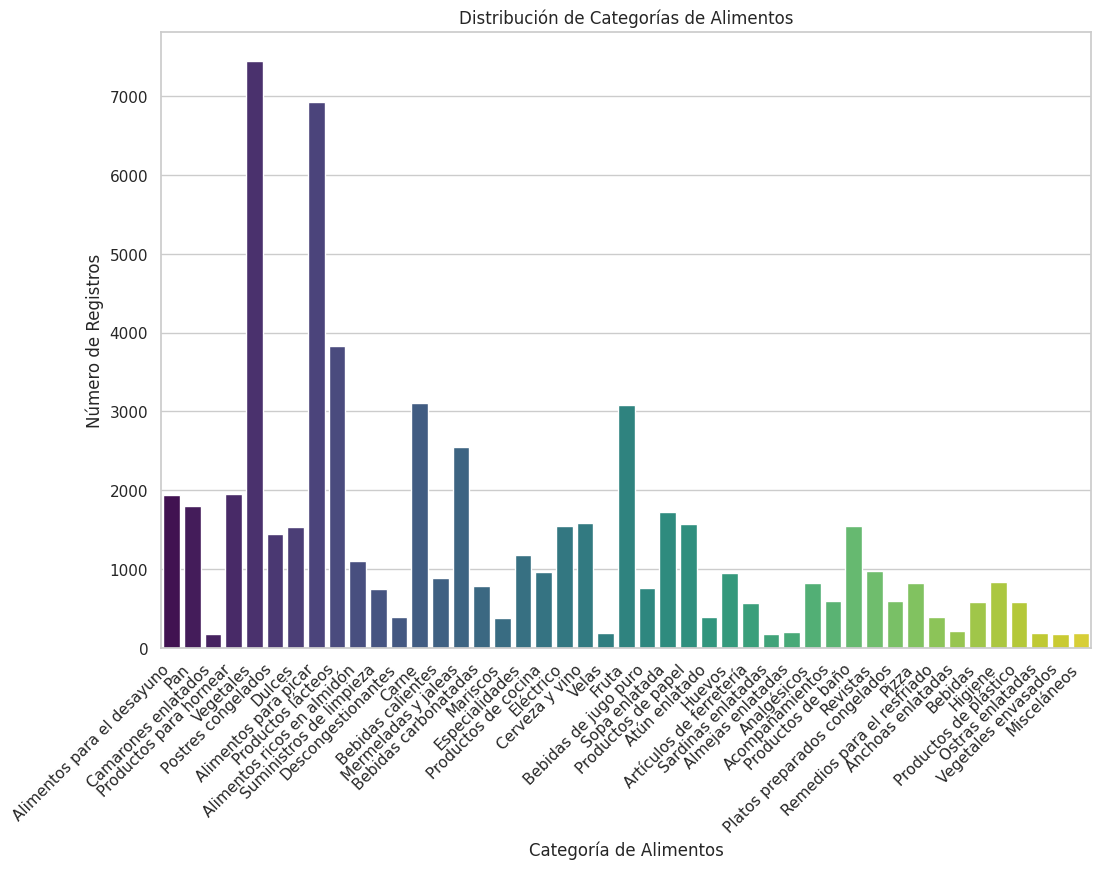

In [27]:
# 4. Gráfico de Barra para Categoría de Alimentos
plt.figure(figsize=(12, 8))
sns.countplot(x='categoria_alimento', data=dataset, palette='viridis')
plt.title('Distribución de Categorías de Alimentos')
plt.xlabel('Categoría de Alimentos')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

Observaciones e Hipótesis 5 (Gráfico de Barra para Categoría de Alimentos):

* Observación: La categoría de alimentos más comúnmente registrada es [Vegetales, Alimentos para picar y Productos lácteos].

* Hipótesis: Se podría considerar una estrategia de marketing enfocada en la categoría de alimentos más popular para aumentar las ventas. De igual manera se podría aplicar a las demás categorías mas comunes.

<ipython-input-28-b75f880703b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='escolaridad', data=dataset, palette='viridis')


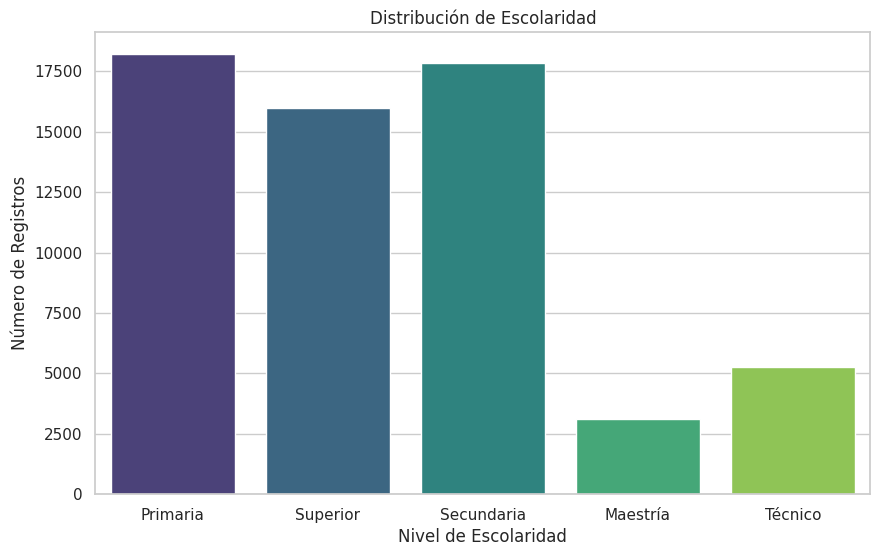

In [28]:
# 5. Histograma para Escolaridad
plt.figure(figsize=(10, 6))
sns.countplot(x='escolaridad', data=dataset, palette='viridis')
plt.title('Distribución de Escolaridad')
plt.xlabel('Nivel de Escolaridad')
plt.ylabel('Número de Registros')
plt.show()

Observaciones e Hipótesis 6 (Histograma para Escolaridad):

* Observación: La mayoría de los clientes tienen un nivel educativo de [Primaria y Nivel de secundaria]. También se observa un nivel que es predominante [Nivel Superior]

* Hipótesis: Puede haber oportunidades para campañas educativas o promociones dirigidas a diferentes niveles educativos. Sin embargo, los niveles "Maestría y Técnico", podría haber oportunidades para estrategias de precios segmentadas o promociones (productos) dirigidas a diferentes segmentos de ingresos.

<ipython-input-29-54145e416448>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocupacion', data=dataset, palette='viridis')


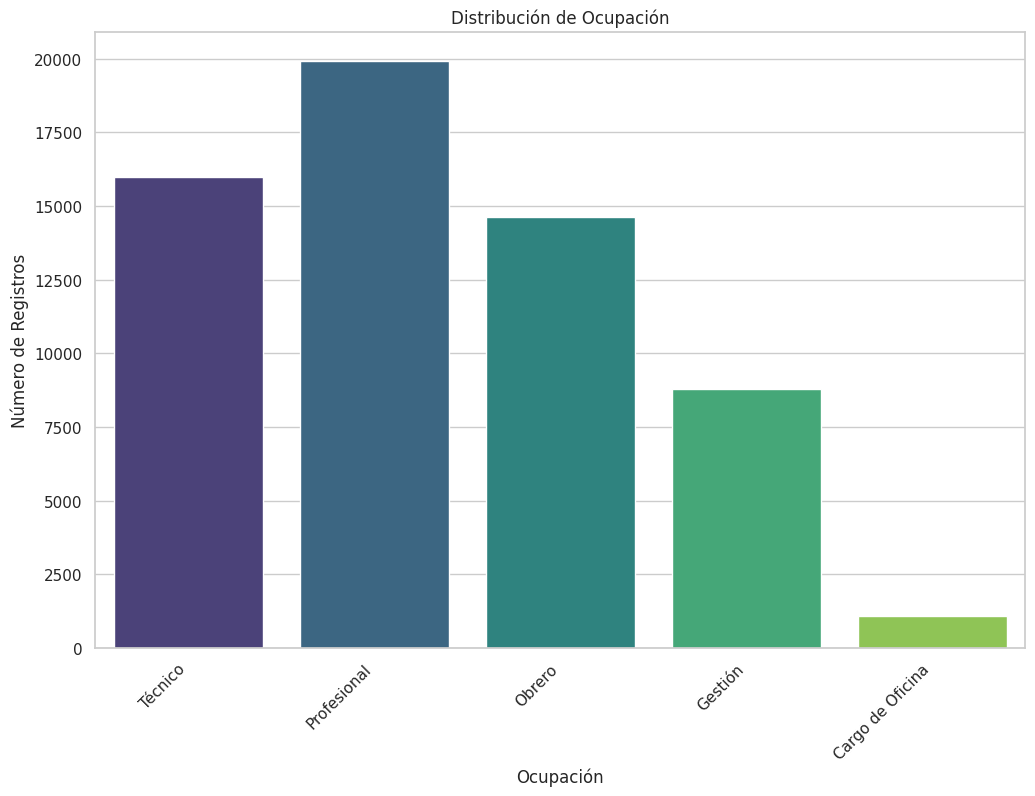

In [29]:
# 6 Gráfico de Barras para Ocupación
plt.figure(figsize=(12, 8))
sns.countplot(x='ocupacion', data=dataset, palette='viridis')
plt.title('Distribución de Ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

Observaciones e Hipótesis 7 (Gráfico de Barras para Ocupación):

Observación: La ocupación más común entre los clientes es [Profesional].

Hipótesis: Estrategias de marketing pueden adaptarse según la ocupación predominante.

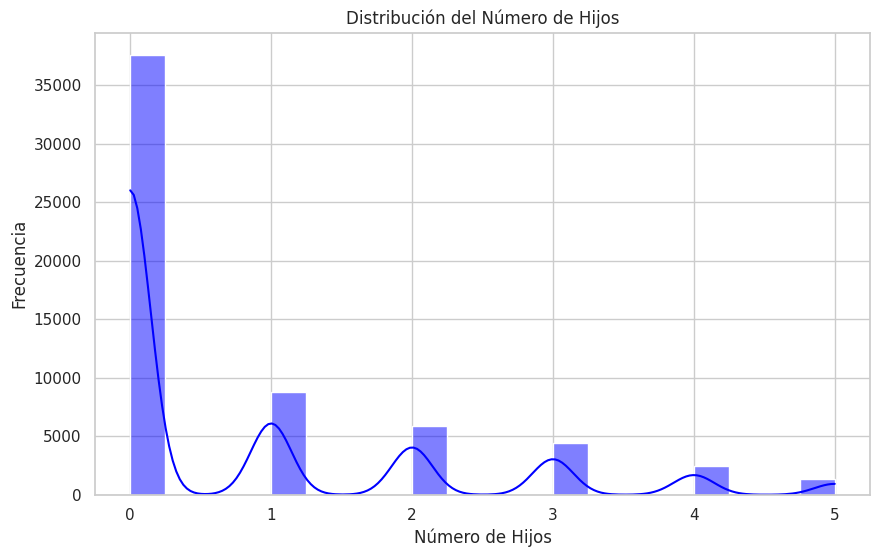

In [30]:
# 7 Histograma para Número de Hijos
plt.figure(figsize=(10, 6))
sns.histplot(dataset['numero_hijos'], bins=20, kde=True, color='blue')
plt.title('Distribución del Número de Hijos')
plt.xlabel('Número de Hijos')
plt.ylabel('Frecuencia')
plt.show()

Observaciones e Hipótesis 8 (Histograma para Número de Hijos):

Observación: La distribución del número de hijos entre los clientes puede ser corregida para clientes con mayor número de hijos. Se observa que los clientes con más hijos en su familia poseen menor interes en los productos o precios de productos ofrecidos por esta empresa.

* Hipótesis: Puede haber oportunidades para estrategias de marketing dirigidas a familias con un número mayor de hijos.

# 4. Preprocesamiento y Obtención de Features

## Codificación de las variables categóricas

**Experiencia de Compra Personalizada**

Para obtener una experiencia de compra más personalizada, rápida y efectiva, es crucial analizar diversas variables que puedan proporcionar información valiosa sobre el comportamiento y las preferencias de los clientes.

* Historial de Compras:

Examinar los productos que un cliente ha comprado anteriormente puede ofrecer insights sobre sus preferencias y necesidades.

* Frecuencia de Compra:

Analizar con qué frecuencia un cliente realiza compras puede ayudar a identificar patrones de comportamiento y lealtad.

* Categorías de Productos:

Entender las categorías de productos que interesan a un cliente puede ser esencial para ofrecer recomendaciones y ofertas personalizadas.

* Valor Monetario de Compras:

Analizar cuánto gasta un cliente en promedio puede ser útil para clasificar clientes y personalizar ofertas basadas en su valor para el negocio.

* Interacciones en el Sitio Web/Plataforma:

Monitorizar las acciones del cliente en tu sitio web o aplicación, como páginas visitadas, productos buscados, y tiempo pasado en el sitio, puede proporcionar información sobre sus intereses.

* Datos Demográficos y Socioeconómicos:

Considerar variables como edad, género, ubicación geográfica, ingresos, etc., para personalizar la experiencia según características demográficas.

* Historial de Devoluciones:

Analizar patrones de devoluciones puede ayudar a entender las preferencias y expectativas de los clientes.

* Canal de Compra Preferido:

Identificar si los clientes prefieren comprar en línea, en tienda física o a través de otros canales puede ayudar a personalizar la experiencia de compra.

* Comportamiento en Redes Sociales:

Si aplicable, observar la actividad de los clientes en redes sociales puede proporcionar información adicional sobre sus intereses y preferencias.

* Feedback y Reseñas:

Analizar comentarios, reseñas y retroalimentación de los clientes puede ser valioso para entender sus experiencias y mejorar el servicio.

* Preferencias de Envío y Pago:

Conocer las preferencias de los clientes en términos de métodos de envío y opciones de pago puede agilizar el proceso de compra.

* Eventos Especiales y Temporadas:

Considerar eventos especiales, días festivos y temporadas puede ayudar a personalizar ofertas y promociones.

* Programas de Lealtad y Recompensas:

Analizar la participación en programas de lealtad y el uso de recompensas puede ser clave para fomentar la lealtad del cliente.

**Variables Categóricas:**
* Categoría de Alimento (categoria_alimento):
  Permite segmentar a los clientes según sus preferencias alimenticias.

* Tipo de Producto (tipo):
  Facilita la segmentación en función de las categorías específicas de productos.

* Promoción (promocion):
  Permite identificar patrones de comportamiento de compra en respuesta a promociones.

* Estado Civil (estado_civil):
  Puede ayudar a segmentar clientes según su estado civil.

* Escolaridad (escolaridad):
  Permite segmentar clientes según su nivel educativo.

* Ocupación (ocupacion):
  Facilita la segmentación según las ocupaciones de los clientes.

* Género (genero):
Permite segmentar clientes por género.

* Ciudad (ciudad) y Estado (estado):
  Pueden ser útiles para segmentar clientes según su ubicación geográfica.

**Variable Resultante (Target):**
**Posibles opciones:**

* Segmentación de Comportamiento de Compra:
  Crear segmentos basados en patrones de compra, frecuencia y valor monetario.

* Segmentación Demográfica:
  Crear segmentos según características demográficas como edad, ingresos, estado civil, etc.

* Segmentación de Preferencias de Producto:
  Identificar segmentos de clientes con preferencias similares de productos.

* Segmentación de Lealtad:
  Crear segmentos según la lealtad del cliente, frecuencia de compra y participación en programas de lealtad.

* Segmentación Geográfica:
  Segmentar clientes según su ubicación geográfica.

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

In [32]:
dataset.tipo.unique()

array(['Comida', 'No comestible', 'Bebida'], dtype=object)

Acciones para la segmentación y clusterización de los datos:

* One-hot encoding para variables categóricas.
* Estandarización de variables numéricas.
* Creación de segmentaciones.
* Evaluación de la calidad de la clusterización utilizando las métricas solicitadas y una baseline generada con números aleatorios.

In [33]:
# @title Definiendo las variables categóricas
df_encoded = dataset.copy()

# Traducción para estandarización de variables categóricas
traduccion_tipo = {'Comida': 1, 'No comestible': 2, 'Bebida': 3}
traduccion_genero = {'Femenino': 0, 'Masculino': 1}
traduccion_escolaridad = {'Primaria': 1, 'Secundaria': 2, 'Superior': 3, 'Maestría': 4, 'Técnico': 5}
traduccion_ocupacion = {'Técnico': 1, 'Profesional': 2, 'Obrero': 3, 'Gestión': 4, 'Cargo de Oficina': 5}
traduccion_estado_civil = {'Soltero': 0, 'Casado': 1}
traduccion_miembro = {'Normal': 1, 'Plata': 2, 'Bronce': 3, 'Oro': 4}
#traduccion_ingreso_anual = {20000: 1, 40000: 2, 60000: 3, 80000: 4, 100000: 5, 120000: 6, 140000: 7, 160000: 8}

# Aplicamos la traducción a las variables categóricas
df_encoded['tipo'] = df_encoded['tipo'].map(traduccion_tipo)
df_encoded['genero'] = df_encoded['genero'].map(traduccion_genero)
df_encoded['escolaridad'] = df_encoded['escolaridad'].map(traduccion_escolaridad)
df_encoded['ocupacion'] = df_encoded['ocupacion'].map(traduccion_ocupacion)
df_encoded['estado_civil'] = df_encoded['estado_civil'].map(traduccion_estado_civil)
df_encoded['miembro'] = df_encoded['miembro'].map(traduccion_miembro)
#df_encoded['ingreso_anual'] = df_encoded['ingreso_anual'].map(traduccion_ingreso_anual)

## Estandarización de los datos y cofificación One-Hot

Se procede a estandarizar nuestros datos (que en este punto deben ser todos numéricos) para que todas las variables puedan ser tenidas en cuenta dentro de una misma escala

**Codificación One-Hot:**

**La codificación one-hot** (también conocida como one-hot encoding o one-of-K encoding) es una técnica utilizada en el procesamiento de datos para convertir variables categóricas en un formato que puede ser proporcionado a algoritmos de aprendizaje automático para mejorar el rendimiento del modelo.

Cuando trabajamos con algoritmos de aprendizaje automático, muchos de ellos requieren que las variables de entrada sean numéricas. Sin embargo, las variables categóricas, que representan categorías o clases discretas, no pueden ser utilizadas directamente en muchos modelos. Es aquí donde entra en juego la codificación one-hot.

La codificación one-hot convierte cada categoría única en una columna binaria separada y asigna un valor binario de 0 o 1 a cada columna para indicar la presencia o ausencia de la categoría en la observación original. Cada columna resultante se denomina "dummy variable" o "indicador".

Aquí hay un ejemplo sencillo para ilustrar la codificación one-hot:

Supongamos que tienes una variable categórica llamada "Color" con tres categorías: Rojo, Verde y Azul. Después de aplicar la codificación one-hot, tendrías tres nuevas columnas: "Rojo", "Verde" y "Azul". Cada fila en estas columnas tendría un 1 en la columna correspondiente al color de esa observación y 0 en las otras dos columnas.

Ejemplo antes de la codificación one-hot:



```
| Color  |
|--------|
| Rojo   |
| Verde  |
| Azul   |
| Rojo   |


| Rojo | Verde | Azul |
|------|-------|------|
| 1    | 0     | 0    |
| 0    | 1     | 0    |
| 0    | 0     | 1    |
| 1    | 0     | 0    |

```

Esta técnica es útil para algoritmos de aprendizaje automático que no pueden manejar directamente variables categóricas y asumen una estructura numérica para las entradas. La librería pandas en Python proporciona la función get_dummies() para realizar la codificación one-hot de manera conveniente.


In [34]:
# @title Paso 1: Codificación One-Hot de Variables Categóricas
# Seleccion de las 2 columnas categóricas más importantes para la codificación one-hot
columnas_categoricas = ['tipo', 'genero']
# Aplicamos la codificación one-hot
df_encoded_resumido = df_encoded[columnas_categoricas]
#df_encoded_resumido = pd.get_dummies(df_encoded_tratar, columns=columnas_categoricas)

In [35]:
# @title Selección de Variable Objetivo (Target)
# Ejemplo de criterio para Segmentación de Comportamiento de Compra

### Se selecciona la variable segmentacion_compra como variable objetivo para la clusterización:
def segmentacion_compra(ventas_tienda):
    if ventas_tienda < 20000:  # Definiendo umbrales de dominio
        return 'Compra Baja'
    elif ventas_tienda < 60000:
        return 'Compra Media'
    else:
        return 'Compra Alta'

# Aplicamos la función al DataFrame para crear la columna target
df_encoded_resumido['segmentacion_compra'] = df_encoded['ingreso_anual'].apply(segmentacion_compra)

traduccion_segmentacion_compra = {'Compra Baja': 1, 'Compra Media': 2, 'Compra Alta': 3}
df_encoded_resumido['segmentacion_compra'] = df_encoded_resumido['segmentacion_compra'].map(traduccion_segmentacion_compra)

<ipython-input-35-ec7030072bfb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_resumido['segmentacion_compra'] = df_encoded['ingreso_anual'].apply(segmentacion_compra)
<ipython-input-35-ec7030072bfb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_resumido['segmentacion_compra'] = df_encoded_resumido['segmentacion_compra'].map(traduccion_segmentacion_compra)


In [36]:
df_encoded_resumido.head()

,tipo,genero,segmentacion_compra
0,1,0,2
1,1,1,3
2,1,0,2
3,1,0,2
4,1,1,2


Para **estandarizar las variables numéricas** y categóricas, puedes seguir estos pasos:

Estandarización de Variables Numéricas:
Utiliza el **StandardScaler de scikit-learn** para estandarizar las variables numéricas. Aquí está el código para ello:

In [37]:
# @title Paso 2: Estandarización de Variables Numéricas

# Se estandarizan las variables numéricas utilizando StandardScaler:

# Seleccion de las columnas numéricas para la estandarización

# Seleccion de las 3 columnas numéricasm más importantes para la estandarización
df_encoded_resumido[['ingreso_anual','total_de_hijos']] = df_encoded[['ingreso_anual','total_de_hijos']]
columnas_numericas_2 = ['tipo', 'genero','ingreso_anual','total_de_hijos', 'segmentacion_compra']

# Aplicando a la estandarización
scaler = StandardScaler()

df_encoded_resumido[columnas_numericas_2] = scaler.fit_transform(df_encoded_resumido[columnas_numericas_2])
X_std = df_encoded_resumido.drop(['segmentacion_compra'], axis=1)

<ipython-input-37-5ac79cbe2da9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_resumido[['ingreso_anual','total_de_hijos']] = df_encoded[['ingreso_anual','total_de_hijos']]
<ipython-input-37-5ac79cbe2da9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_resumido[['ingreso_anual','total_de_hijos']] = df_encoded[['ingreso_anual','total_de_hijos']]
<ipython-input-37-5ac79cbe2da9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

## Resumen de la segmentación de productos y clientes

In [38]:
df_encoded_resumido.head()

,tipo,genero,segmentacion_compra,ingreso_anual,total_de_hijos
0,-0.580732,-0.976189,-0.927830,-1.061471,-1.029341
1,-0.580732,1.024392,1.077783,0.046757,-1.700413
2,-0.580732,-0.976189,-0.927830,-1.061471,0.983876
3,-0.580732,-0.976189,-0.927830,-0.507357,-0.358269
4,-0.580732,1.024392,-0.927830,-0.507357,-1.700413


In [39]:
# Variables estandarizadas
X_std.head()

,tipo,genero,ingreso_anual,total_de_hijos
0,-0.580732,-0.976189,-1.061471,-1.029341
1,-0.580732,1.024392,0.046757,-1.700413
2,-0.580732,-0.976189,-1.061471,0.983876
3,-0.580732,-0.976189,-0.507357,-0.358269
4,-0.580732,1.024392,-0.507357,-1.700413


In [40]:
# Variable objetivo (target) para clusterización
y = df_encoded_resumido['segmentacion_compra']

In [41]:
y.head()

0   -0.927830
1    1.077783
2   -0.927830
3   -0.927830
4   -0.927830
Name: segmentacion_compra, dtype: float64

# 5. Validación de los clusters (Clusterización y validación)

**Clusterización**

1. **El algoritmo recomendado para la clusterización es KMeans, sin embargo, eres libre de utilizar cualquier otro algoritmo como Mean Shift o, incluso, DBSCAN. Lo importante es hallar el mejor número de clusters.**

Validación

2. Número de clusters: Debes instanciar de 3 a máximo 10 clusters con el(los) algoritmo(s) seleccionado(s), utilizando X_std y obtener cómo mínimo el puntaje de Silhouette, aunque te recomiendo utilizar otras métricas como Davies-Bouldin y Calinski and Harabasz para que puedas decidir cuál es la mejor configuración para el número de clusters.

Restricciones: (El puntaje mínimo de Silhouette debe ser de 0.50; el de Davies-Bouldin máximo de 0.75; y el de CalinskiHarabasz, el número más alto posible.)

3. Estructura: Debes evaluar la estructura de los clusters tomando como referencia una baseline. Para generar la baseline, vamos a generar números aleatorios con el módulo random de numpy con las mismas dimensiones de tu dataset X_std y lo vas a almacenar en una variable llamada random_data y vas a repetir el paso 2. Analiza los puntajes da la(s) métrica(s) utilizada y asegúrate de que tu X_std tiene un desempeño muy superior al de random_data.

4. Estabilidad: Finalmente, debes evaluar la estabilidad de los clusters con el número de clusters seleccionado en el paso 2. Para ello, debes segmentar X_std en 3 o 5 partes iguales, (puedes apoyarte en la función array_split() de numpy, y almacenar cada fragmento del dataset en una variable llamada set_1, set_2, ..., set_n) y repetir los pasos de validación para el número de clusters escogido en cada uno de los sets. Aquí  lo verdaderamente importante es que los puntajes no presenten una variación mayor a ±5% entre sí. Esto va a garantizar que hay homogeneidad en la composición de los clusters.

Si has logrado llevar a cabo con éxito los pasos anteriores, puedes avanzar a la próxima fase. En caso contrario, verifica nuevamente las variables: añade, remueve, cambia por otras, y repite de nuevo los pasos de la tarjeta anterior para poder repetir los pasos de esta tarjeta hasta que obtengas los resultados sugeridos.

Instanciando la mejor configuración de clusters

5. Vas a instanciar el algoritmo de clusterización una vez , con la configuración escogida, y vas a crear un nuevo atributo en el dataset datos_raw llamado 'cluster' para almacenar los labels de los clusters.

Nota: Te sugiero que no ejecutes KMeans de nuevo, porque los clusters van a cambiar de label y color con cada ejecución del algoritmo.

6. Vas a realizar varios gráficos de dispersión para comparar las variables añadiendo una tercera dimensión con los clusters en el parámetro hue  del gráfico. Trata de describir tus observaciones. Por ejemplo: En el cluster 0, de color rojo, se encuentran agrupados los clientes que gastan más dinero en productos no comestibles.

Repite el paso anterior hasta que puedas obtener varias descripciones de cada uno de los clusters.

**La puntuación de Silhouette** es una medida que cuantifica cuán similar es un objeto a su propio clúster (cohesión) en comparación con otros clústeres (separación). La puntuación de Silhouette varía entre -1 y 1, donde un valor cercano a 1 indica una buena separación entre clústeres, 0 indica solapamiento entre clústeres y -1 indica una mala asignación de clúster.

Si la puntuación de Silhouette está lejos de 0.5, puede haber varias razones para esto, y algunas estrategias para mejorarla incluyen:

* Selección adecuada de número de clústeres (k): Asegúrate de haber seleccionado un número apropiado de clústeres. Puedes probar con diferentes valores de k y observar cómo cambian las puntuaciones de Silhouette.

* Mejora de la calidad de los datos: Asegúrate de que tus datos estén limpios y no contengan valores atípicos que puedan afectar negativamente la calidad de la clusterización.

* Mejora de la elección de características: La selección de características juega un papel crucial en la calidad de la clusterización. Asegúrate de seleccionar características relevantes para el problema y elimina las que puedan introducir ruido.

* Exploración de otros algoritmos de clusterización: Dependiendo de la naturaleza de tus datos, otros algoritmos de clusterización podrían funcionar mejor que KMeans. Prueba con algoritmos como DBSCAN, Agglomerative Clustering, o Gaussian Mixture Models (GMM).

* Ajuste de hiperparámetros: Si estás utilizando KMeans, ajusta los hiperparámetros, como el método de inicialización y el número máximo de iteraciones, para ver si afectan la calidad de la clusterización.

* Normalización o estandarización adecuada de los datos: Asegúrate de que tus datos estén en una escala adecuada. A veces, la estandarización de variables puede mejorar la calidad de la clusterización.

* Exploración de métricas adicionales: Además de Silhouette, considera utilizar otras métricas de validación de clusterización, como Davies-Bouldin o Calinski and Harabasz, para tener una comprensión más completa del rendimiento del modelo.

En general, es un proceso iterativo de prueba y error para encontrar la configuración y los datos óptimos que mejoren la puntuación de Silhouette.


La interpretación de la **puntuación de Silhouette** puede variar, pero en general, se considera que una buena clusterización tiene una puntuación de Silhouette cercana a 1. Aquí hay una guía general para interpretar las puntuaciones de Silhouette:

Cerca de +1: Indica que el objeto está bien dentro de su propio clúster y lejos de los clústeres vecinos. Esto es una indicación de una buena separación entre clústeres.

Cerca de 0: Indica que el objeto está en o muy cerca del límite de decisión entre dos clústeres. Esto puede ocurrir en áreas de solapamiento entre clústeres.

Cerca de -1: Indica que el objeto puede haber sido asignado al clúster incorrecto. Esto sugiere que hay una posible mala asignación de clúster.

Dicho esto, no hay un "mejor" valor único para la puntuación de Silhouette, ya que su interpretación depende del contexto y la naturaleza de los datos. Sin embargo, en muchos casos, se considera que un valor de Silhouette superior a 0.5 es razonablemente bueno. Un valor inferior a 0.5 puede indicar que hay solapamiento entre clústeres o que los clústeres no están bien definidos.

Es importante tener en cuenta que Silhouette es solo una de varias métricas de evaluación de clusterización, y siempre se debe considerar en conjunto con otras métricas y análisis visual para obtener una comprensión completa del rendimiento del modelo de clusterización.






La interpretación de las **métricas Davies-Bouldin y Calinski-Harabasz** también depende del contexto y la naturaleza de los datos. Aquí hay una guía general para interpretar estas métricas:

* Davies-Bouldin Index:
Cerca de 0: Indica una mejor clusterización. Un valor bajo significa que los clústeres están bien separados.

* Mayor a 1: Indica que la clusterización puede no ser óptima. Cuanto mayor sea el valor, peor será la clusterización.

* Calinski-Harabasz Index:
Mayor valor: Indica una mejor clusterización. Cuanto mayor sea el valor, más compactos y separados son los clústeres.
Ambas métricas buscan evaluar la cohesión intra-clúster y la separación inter-clúster. En general, para Davies-Bouldin, un valor más bajo es mejor, mientras que para Calinski-Harabasz, un valor más alto es mejor.

No hay un rango específico que se considere "mejor" de manera universal, ya que la interpretación puede variar según el dominio de aplicación y la complejidad de los datos. La comparación de estos valores debe hacerse en el contexto del problema específico que estás abordando.

Como regla general, se pueden comparar diferentes configuraciones de clusterización y elegir aquella que maximice la cohesión intra-clúster y minimice la separación inter-clúster, según las métricas proporcionadas. Sin embargo, la interpretación precisa puede depender de la naturaleza específica de tus datos y tus objetivos.

*Cuando se tienen más de diez variables categóricas en un modelo de machine learning*, especialmente en un contexto de clusterización, se pueden enfrentar varios desafíos y consideraciones:

* **Maldición de la dimensionalidad: A medida que aumenta el número de variables, el espacio de características se vuelve más disperso y las distancias entre puntos de datos pueden perder significado. Esto se conoce como la maldición de la dimensionalidad y puede afectar la calidad de la clusterización.**

* Complejidad del modelo: Con un gran número de variables, el modelo puede volverse más complejo y requerir más recursos computacionales para entrenar y evaluar. Esto puede llevar a un aumento en el tiempo de entrenamiento y la complejidad computacional.

* Selección de variables: Es importante realizar una selección adecuada de variables para garantizar que estás utilizando las más relevantes para tu problema. La inclusión de variables irrelevantes o redundantes puede afectar negativamente el rendimiento del modelo.

* Codificación de variables categóricas: La codificación de variables categóricas puede volverse más compleja con un gran número de categorías. Asegúrate de utilizar métodos de codificación adecuados, como One-Hot Encoding, especialmente si las variables categóricas tienen muchas categorías únicas.

* Interpretación y visualización: La interpretación de un modelo con muchas variables puede ser desafiante. Además, la visualización de resultados también puede volverse más complicada. Es importante utilizar técnicas de reducción de dimensionalidad o visualización específicas para manejar conjuntos de datos de alta dimensionalidad.

* Posible pérdida de información: Si algunas variables categóricas no son informativas o tienen muchas categorías únicas con poca representación, podrían no contribuir significativamente al modelo y podrían considerarse para su eliminación.

* Validación del modelo: Con un mayor número de variables, es esencial realizar una validación del modelo adecuada para evaluar su rendimiento en datos no vistos y evitar el sobreajuste.

En resumen, si se tiene más de diez variables categóricas, es crucial abordar estos desafíos mediante una cuidadosa selección de variables, codificación adecuada y evaluación del rendimiento del modelo.

Para ajustar los ***hiperparámetros del algoritmo KMeans***, se puede utilizar la clase ***KMeans de scikit-learn***. Algunos de los hiperparámetros clave que puedes ajustar son:

* n_clusters: Número de clústeres que deseas formar.
* init: Método de inicialización de los centroides. Puedes probar con **"k-means++"** (inicialización inteligente) o **"random"** (inicialización aleatoria).
* n_init: Número de veces que se ejecutará el algoritmo con diferentes centroides iniciales. Selecciona el mejor resultado.
* max_iter: Número máximo de iteraciones para una sola ejecución del algoritmo KMeans.


**La propiedad kmeans.labels_ en scikit-learn** devuelve las etiquetas asignadas a cada muestra por el algoritmo de KMeans después de haber ajustado el modelo. Estas etiquetas representan a qué cluster pertenece cada punto de datos.

Cuando se aplica el método **fit** en un modelo de **KMeans en scikit-learn**, el modelo asigna cada punto de datos a uno de los clusters, y estas asignaciones se almacenan en la propiedad labels_.

**En el contexto de la evaluación de la clusterización utilizando KMeans y la generación de una línea base (baseline), no hay valores "ideales" predefinidos para las métricas de Silhouette, Davies-Bouldin y Calinski-Harabasz. Sin embargo, podemos establecer algunos criterios generales para interpretar estas métricas:**

* **Silhouette Score:**

* Un Silhouette Score cercano a 1 indica que los puntos están bien asignados a sus clusters y están distantes de otros clusters.
* Un Silhouette Score cercano a -1 indica que una muestra ha sido asignada a un cluster incorrecto.
* Un Silhouette Score alrededor de 0 indica que los clusters se superponen.
Davies-Bouldin Index:

* Un valor más bajo indica una mejor clusterización.
* El rango típico es [0, +∞], donde 0 significa una buena clusterización.
Calinski-Harabasz Index:

* Un valor más alto indica una mejor clusterización.
* No hay un rango específico, pero valores más altos son preferibles.

En términos de la línea base (baseline), se puede usar el Silhouette Score promedio, Davies-Bouldin Index y Calinski-Harabasz Index calculados sobre un conjunto de datos generado aleatoriamente (random_data) como referencia para evaluar la eficacia de la clusterización de KMeans en los datos reales (X_std).

## Clusterización con KMeans y Evaluación

Algoritmo de KMeans con un rango de 3 a 10 clusters y evaluamos la calidad de la clusterización utilizando métricas como Silhouette, Davies-Bouldin y Calinski and Harabasz:

In [42]:
# Función para realizar la clusterización y obtener métricas

def cluster_metrics(X, n_clusters, seed):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=seed)
    labels = kmeans.fit_predict(X)

    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    return silhouette, davies_bouldin, calinski_harabasz, labels, kmeans

In [43]:
# Rango de clusters
cluster_range = range(66, 71)
SEED = 42

# Resultados para cada número de clusters
results = []

for n_clusters in cluster_range:
    silhouette, davies_bouldin, calinski_harabasz, labels, _ = cluster_metrics(X_std, n_clusters, SEED)
    results.append((n_clusters, silhouette, davies_bouldin, calinski_harabasz, labels))

# Mostrar resultados
for result in results:
    n_clusters, silhouette, davies_bouldin, calinski_harabasz, _ = result
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette:.4f}, Davies-Bouldin: {davies_bouldin:.4f}, Calinski-Harabasz: {calinski_harabasz:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 66, Silhouette: 0.6073, Davies-Bouldin: 0.7453, Calinski-Harabasz: 23977.5123
Clusters: 67, Silhouette: 0.5826, Davies-Bouldin: 0.7491, Calinski-Harabasz: 23977.3472
Clusters: 68, Silhouette: 0.6289, Davies-Bouldin: 0.6857, Calinski-Harabasz: 24551.4338
Clusters: 69, Silhouette: 0.6355, Davies-Bouldin: 0.7036, Calinski-Harabasz: 25005.1465
Clusters: 70, Silhouette: 0.6330, Davies-Bouldin: 0.7054, Calinski-Harabasz: 24768.8259


In [44]:
# Mostrar resultados
for result in results:
    n_clusters , silhouette, davies_bouldin, _ , _ = result
    if ((davies_bouldin > 0.7480) & (davies_bouldin < 0.7500)):
      print(f"Valores límites válidos para las siguientes métricas: (Silhouette_mínimo > 0.50) = {silhouette:.4f}, (Davies-Bouldin_máximo < 0.75) = {davies_bouldin:.4f}, para el clúster = {n_clusters}")

Valores límites válidos para las siguientes métricas: (Silhouette_mínimo > 0.50) = 0.5826, (Davies-Bouldin_máximo < 0.75) = 0.7491, para el clúster = 67


**Resultado:** a partir del clúster 67 todos los cluster se están ordenando y separando de los demás cluster, redirigiendo los centroides. Los puntajes se encuentran dentro de los límjtes esperados, por lo que se consideran que no existe solapamiento entre clusteres vecinos.


### .

En la línea de **código random_data, _ = make_blobs(n_samples=len(X_std), centers=3, random_state=42)**, el símbolo de piso (_) se utiliza para indicar que no nos interesa almacenar el segundo valor retornado por la función make_blobs. En Python, el guion bajo (_) es una convención para indicar que no se va a utilizar esa variable.

La función **make_blobs** es parte del módulo sklearn.datasets y se utiliza para generar conjuntos de datos simulados para tareas de clustering. En este caso específico:

* n_samples: Especifica el número de muestras (puntos de datos) que se generarán en total.
* centers: Especifica el número de centros o clusters que se desean en el conjunto de datos.
* random_state: Es una semilla para la generación de números aleatorios, lo que garantiza que obtendrás los mismos datos aleatorios si usas la misma semilla.
* La función devuelve un par de valores: el conjunto de datos generado (random_data) y las etiquetas de los clusters a los que pertenece cada punto en el conjunto de datos generado (_ en este caso, ya que no nos interesa almacenarlas). En este contexto, se está utilizando *make_blobs* para crear un conjunto de datos de referencia aleatorio que servirá como línea base (baseline) para comparar las métricas de clusterización obtenidas con KMeans en los datos reales.

Se puede generar números aleatorios con el módulo numpy utilizando la función **numpy.random.rand** para crear un conjunto de datos aleatorio con las mismas dimensiones que **X_std**.

In [45]:
# Función para realizar la clusterización y obtener métricas
def cluster_metrics_comp_1(X, n_clusters, seed):
  # Generar datos aleatorios para la línea base
  random_data, _ = make_blobs(n_samples=len(X), centers=n_clusters, random_state=seed)

  # Aplicar KMeans a random_data
  kmeans_random = KMeans(n_clusters=n_clusters, random_state=seed)
  kmeans_random_labels = kmeans_random.fit_predict(random_data)

  # Calcular métricas para la línea base
  silhouette_baseline = silhouette_score(random_data, kmeans_random_labels)
  davies_bouldin_baseline = davies_bouldin_score(random_data, kmeans_random_labels)
  calinski_harabasz_baseline = calinski_harabasz_score(random_data, kmeans_random_labels)

  return silhouette_baseline , davies_bouldin_baseline , calinski_harabasz_baseline , kmeans_random_labels

# Rango de clusters
cluster_range_baseline = range(67, 70)
SEED = 42

# Resultados para cada número de clusters
results_baseline = []

for n_clusters_baseline in cluster_range_baseline:
    silhouette_baseline , davies_bouldin_baseline , calinski_harabasz_baseline , _ = cluster_metrics_comp_1(X_std, n_clusters_baseline, SEED)
    results_baseline.append((n_clusters_baseline, silhouette_baseline , davies_bouldin_baseline , calinski_harabasz_baseline))

# Mostrar resultados
for result_baseline in results_baseline:
    n_clusters_baseline, silhouette_baseline , davies_bouldin_baseline , calinski_harabasz_baseline = result_baseline
    print(f"Clusters: {n_clusters_baseline}, Silhouette: {silhouette_baseline:.4f}, Davies-Bouldin: {davies_bouldin_baseline:.4f}, Calinski-Harabasz: {calinski_harabasz_baseline:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 67, Silhouette: 0.3260, Davies-Bouldin: 0.8577, Calinski-Harabasz: 72752.9127
Clusters: 68, Silhouette: 0.3265, Davies-Bouldin: 0.8632, Calinski-Harabasz: 72532.8414
Clusters: 69, Silhouette: 0.3251, Davies-Bouldin: 0.8596, Calinski-Harabasz: 71302.8769


In [46]:
# **

In [47]:
# Función para realizar la clusterización y obtener métricas
def cluster_metrics_comp_2(X, n_clusters, seed):
  # Generar baseline con datos aleatorios
  random_data = np.random.rand(*X.shape)

  # Aplicar KMeans a random_data
  kmeans_random = KMeans(n_clusters=n_clusters, random_state=seed)
  kmeans_random_labels2 = kmeans_random.fit_predict(random_data)

  # Calcular métricas para la línea base
  silhouette_baseline2 = silhouette_score(random_data, kmeans_random_labels2)
  davies_bouldin_baseline2 = davies_bouldin_score(random_data, kmeans_random_labels2)
  calinski_harabasz_baseline2 = calinski_harabasz_score(random_data, kmeans_random_labels2)

  return silhouette_baseline2 , davies_bouldin_baseline2 , calinski_harabasz_baseline2 , kmeans_random_labels2

# Rango de clusters
cluster_range_baseline2 = range(67, 70)
SEED = 42

# Resultados para cada número de clusters
results_baseline2 = []

for n_clusters_baseline2 in cluster_range_baseline2:
    silhouette_baseline2 , davies_bouldin_baseline2 , calinski_harabasz_baseline2 , _ = cluster_metrics_comp_2(X_std, n_clusters_baseline2, SEED)
    results_baseline2.append((n_clusters_baseline2, silhouette_baseline2 , davies_bouldin_baseline2 , calinski_harabasz_baseline2))

# Mostrar resultados
for result_baseline2 in results_baseline2:
    n_clusters_baseline2, silhouette_baseline2 , davies_bouldin_baseline2 , calinski_harabasz_baseline2 = result_baseline2
    print(f"Clusters: {n_clusters_baseline2}, Silhouette: {silhouette_baseline2:.4f}, Davies-Bouldin: {davies_bouldin_baseline2:.4f}, Calinski-Harabasz: {calinski_harabasz_baseline2:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 67, Silhouette: 0.1884, Davies-Bouldin: 1.1397, Calinski-Harabasz: 6655.6285
Clusters: 68, Silhouette: 0.1892, Davies-Bouldin: 1.1403, Calinski-Harabasz: 6617.3372
Clusters: 69, Silhouette: 0.1877, Davies-Bouldin: 1.1356, Calinski-Harabasz: 6562.7527


**Resultado:** Se obtuvo del dataset "X_std" con un excelente desempeño en comparación con el dataset "random_data", las métricas obetenidas en el modelo original posee puntajes mas estables con cluster mas separados de los demás cluster.

## Evaluando la estabilidad de los clústers con el número de clústers de mayor rendimiento


**Para evaluar la estabilidad de los clusters con el número de clusters seleccionado, se pueden seguir los siguientes pasos:**

1. Divide X_std en 3 o 5 partes iguales utilizando numpy.array_split() y almacena cada fragmento en variables llamadas set_1, set_2, ..., set_n.
2. Repite los pasos de validación (clustering con KMeans, métricas de evaluación) para cada conjunto (set_1, set_2, ..., set_n) utilizando el número de clusters seleccionado en el paso anterior.
3. Calcula las métricas de evaluación para cada conjunto y compara los puntajes. Verifica que los puntajes no presenten una variación mayor al ±5% entre sí.

Este proceso garantizará que hay homogeneidad en la composición de los clusters entre los diferentes conjuntos. Si los puntajes no presentan una variación mayor al ±5%, se puede considerar que los clusters son estables.

In [48]:
# Dividiendo X_std en "n_splits = 5" partes)
n_splits = 5
sets = np.array_split(X_std, n_splits)  # n_splits es el número de conjuntos
set_1, set_2, set_3, set_4, set_5 = sets

# Rango de clusters (Se instancian cuatro clusters)
cluster_range_estabilidad = range(66, 71)
SEED = 42

In [49]:
def verificar_variacion(lista):
    for i in range(len(lista) - 1):
        variacion_porcentual = abs((lista[i + 1] - lista[i]) / lista[i]) * 100
        if variacion_porcentual >= 5:
            return False
    return True

### 5 conjuntos para comprobar la estabilidad de los clusters: set_1, set_2, set_3, set_4, set_5

In [50]:
# Set_1:

# Resultados para cada número de clusters

results_1 = []

for cluster_range_set_1 in cluster_range_estabilidad:
    silhouette_1, _ , _, _, _ = cluster_metrics(set_1, cluster_range_set_1, SEED)
    results_1.append((silhouette_1))

resultado = verificar_variacion(results_1)

if resultado:
    print("La variación entre cada par de datos no es mayor del ±5%.")
else:
    print("La variación entre al menos un par de datos es mayor del ±5%.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

La variación entre cada par de datos no es mayor del ±5%.


In [ ]:
# Set_2:

# Resultados para cada número de clusters

results_2 = []

for cluster_range_set_2 in cluster_range_estabilidad:
    silhouette_2, _ , _, _, _ = cluster_metrics(set_2, cluster_range_set_2, SEED)
    results_2.append((silhouette_2))

resultado = verificar_variacion(results_2)

if resultado:
    print("La variación entre cada par de datos no es mayor del ±5%.")
else:
    print("La variación entre al menos un par de datos es mayor del ±5%.")

In [52]:
# Set_3:

# Resultados para cada número de clusters

results_3 = []

for cluster_range_set_3 in cluster_range_estabilidad:
    silhouette_3, _ , _, _, _ = cluster_metrics(set_3, cluster_range_set_3, SEED)
    results_3.append((silhouette_3))

resultado = verificar_variacion(results_3)

if resultado:
    print("La variación entre cada par de datos no es mayor del ±5%.")
else:
    print("La variación entre al menos un par de datos es mayor del ±5%.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

La variación entre al menos un par de datos es mayor del ±5%.


In [ ]:
# Set_4:

# Resultados para cada número de clusters

results_4 = []

for cluster_range_set_4 in cluster_range_estabilidad:
    silhouette_4, _ , _, _, _ = cluster_metrics(set_4, cluster_range_set_4, SEED)
    results_4.append((silhouette_4))

resultado = verificar_variacion(results_4)

if resultado:
    print("La variación entre cada par de datos no es mayor del ±5%.")
else:
    print("La variación entre al menos un par de datos es mayor del ±5%.")

In [ ]:
# Set_5:

# Resultados para cada número de clusters

results_5 = []

for cluster_range_set_5 in cluster_range_estabilidad:
    silhouette_5, _ , _, _, _ = cluster_metrics(set_5, cluster_range_set_5, SEED)
    results_5.append((silhouette_4))

resultado = verificar_variacion(results_5)

if resultado:
    print("La variación entre cada par de datos no es mayor del ±5%.")
else:
    print("La variación entre al menos un par de datos es mayor del ±5%.")

**Resultado:** La mayoría de los datos recogidos del dataset "X_std" en la comprobación de estabilidad arrojó como resultado: que en la mayoría de las pruebas la variación entre cada par de datos no es mayor del ±5%.

### Instanciando la mejor configuración de clusters

In [ ]:
labels

In [ ]:
# Configuración del algoritmo de K-Means (puedes ajustar estos parámetros según sea necesario)

# Añadir la columna 'cluster' al DataFrame original
datos_raw_T = df_encoded.copy()
datos_raw = datos_raw_T[['tipo', 'genero', 'ingreso_anual', 'total_de_hijos']]
for label in labels:
  if ((label > 66) and (label < 71)):
    label_final = label

datos_raw['cluster'] = labels

# Ahora, en datos_raw, el nuevo atributo 'cluster' contiene las etiquetas de los clusters asignadas por el algoritmo

In [57]:
datos_raw.head()

,tipo,genero,ingreso_anual,total_de_hijos,cluster
0,1,0,20000,1.0,59
1,1,1,60000,0.0,6
2,1,0,20000,4.0,62
3,1,0,40000,2.0,36
4,1,1,40000,0.0,6


In [ ]:
datos_raw.tipo.unique()

In [ ]:
# @title Actualizando los valores de las columnas "tipo" y "genero" del dataset "datos_raw"
traduccion_tipo_resultante = {1:'Comida', 2:'No comestible', 3:'Bebida'}
traduccion_genero_resultante = {0:'Femenino', 1:'Maculino'}
datos_raw['tipo'] = datos_raw.tipo.replace(traduccion_tipo_resultante)
datos_raw['genero'] = datos_raw.genero.replace(traduccion_genero_resultante)

In [60]:
datos_raw.head()

,tipo,genero,ingreso_anual,total_de_hijos,cluster
0,Comida,Femenino,20000,1.0,59
1,Comida,Maculino,60000,0.0,6
2,Comida,Femenino,20000,4.0,62
3,Comida,Femenino,40000,2.0,36
4,Comida,Maculino,40000,0.0,6


### 6. Gráficos de dispersión para comparar las variables

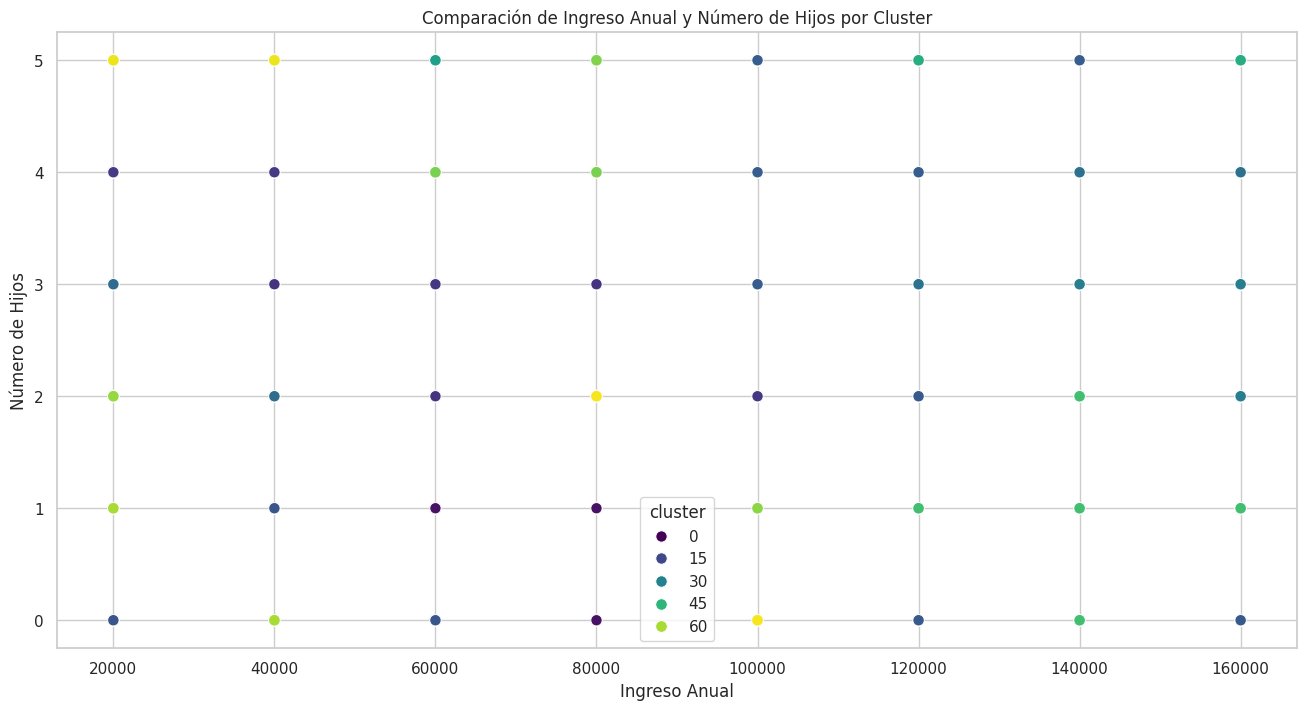

In [61]:
# Ejemplo de gráfico de dispersión para comparar 'ingreso_anual' y 'numero_hijos' con el color del cluster
plt.figure(figsize=(16, 8))
sns.scatterplot(data=datos_raw, x='ingreso_anual', y='total_de_hijos', hue='cluster', palette='viridis', size='cluster', sizes=(66,71), size_order=['menor','estable','mas_estable','mayor', 'mayor_poder_adquisitivo', 'rico'])
plt.title('Comparación de Ingreso Anual y Número de Hijos por Cluster')
plt.xlabel('Ingreso Anual')
plt.ylabel('Número de Hijos')
plt.show()




In [62]:
# @title Función para graficar los clustr en cada una de las variables presentes en el dataset "datos_raw"
def plot_clusters(datos_raw, variables, clusters_to_plot):
    # Configuración de colores
    colores_clusters = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown']

    # Filtrar datos para los clusters específicos
    cluster_data = datos_raw[datos_raw['cluster'].isin(clusters_to_plot)]

    # Crear gráfico de dispersión
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=variables[0], y=variables[1], hue='cluster', palette=colores_clusters, data=cluster_data, s=100)
    plt.title(f'Dispersión para Clusters {clusters_to_plot}')
    plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
    plt.show()

<ipython-input-62-be3fd4db0511>:11: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=variables[0], y=variables[1], hue='cluster', palette=colores_clusters, data=cluster_data, s=100)


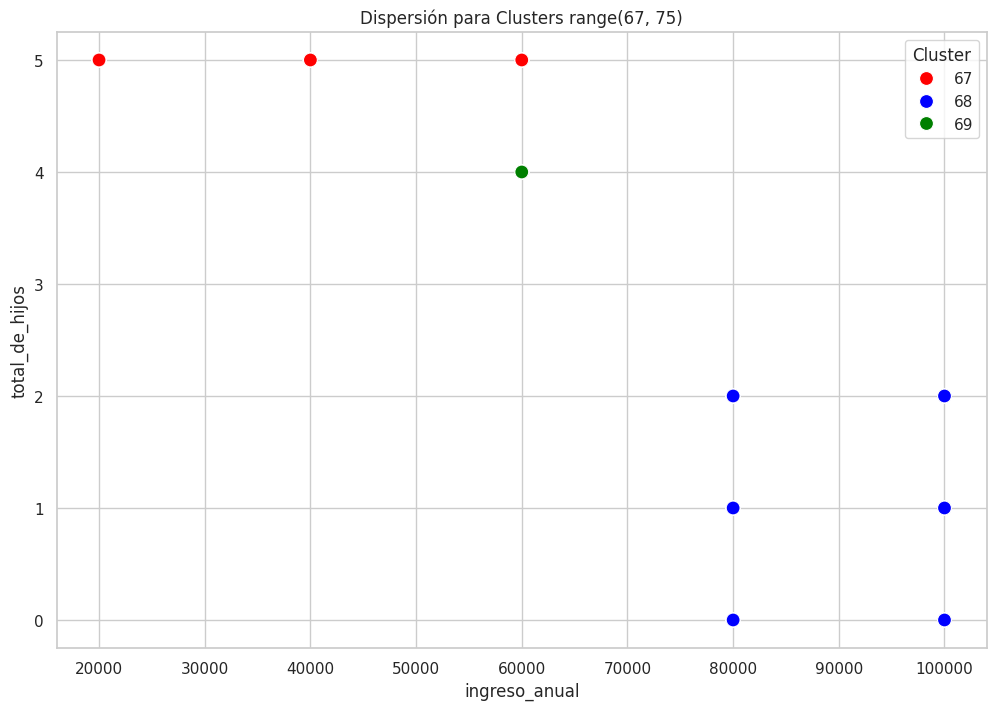

In [63]:
variables_a_comparar = ['ingreso_anual', 'total_de_hijos']
clusters_seleccionados = range(67, 75)

plot_clusters(datos_raw, variables_a_comparar, clusters_seleccionados)

En el **contexto de la clusterización**, es fundamental interpretar las diferencias y similitudes entre los clusters para obtener información valiosa.

* Ingreso Anual vs. Número de Hijos:

* Cluster 67 (Rojo): Este cluster tiene un moderado ingreso anual y varios hijos. Pueden ser identificados como clientes con recursos económicos intermedios y mayores responsabilidades familiares.
* Cluster 68 (Azul): Caracterizado por un ingreso anual alto y un número medio de hijos. Podrían ser familias de ingresos altos con una estructura familiar equilibrada.
* Cluster 69 (Verde): Muestra ingresos medio y un número significativo de hijos. Podrían ser familias con recursos económicos medio-alto y múltiples miembros en la familia.

En este caso en particular se observa una mejor resultado para el clúster 69, los valores son equilibrados.

<ipython-input-62-be3fd4db0511>:11: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=variables[0], y=variables[1], hue='cluster', palette=colores_clusters, data=cluster_data, s=100)


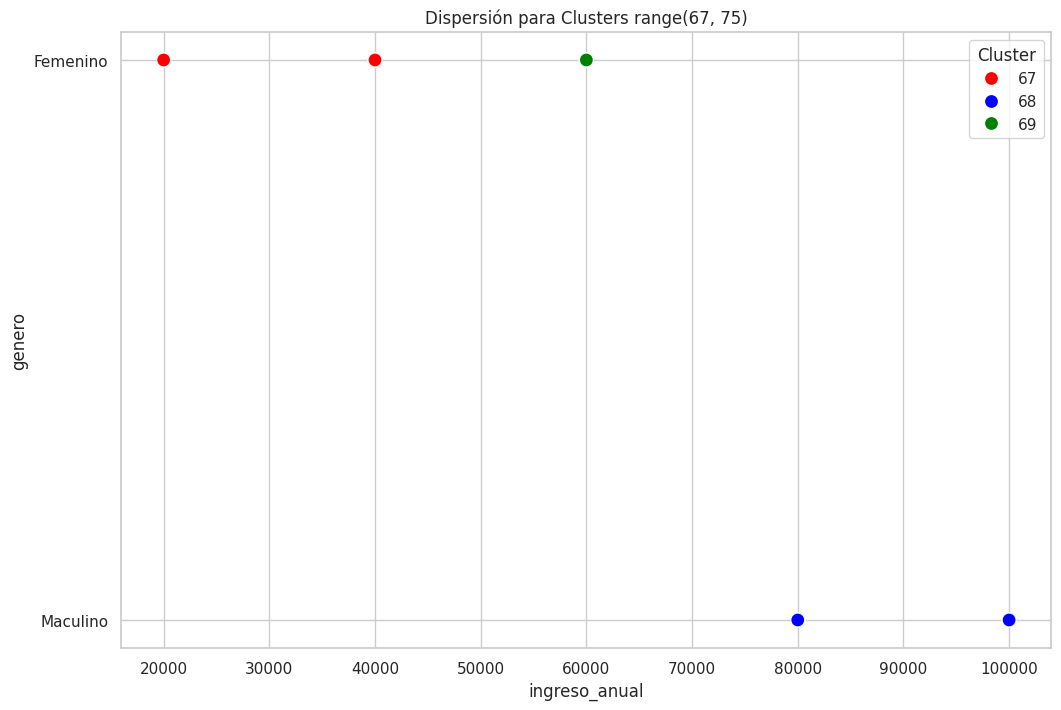

In [64]:
variables_a_comparar = ['ingreso_anual', 'genero']
clusters_seleccionados = range(67, 75)

plot_clusters(datos_raw, variables_a_comparar, clusters_seleccionados)


Ingreso Anual vs. Género:

* Cluster 67 (Rojo): Este cluster tiene un muy bajo ingreso anual el género femenino.
* Cluster 68 (Azul): Caracterizado por un ingreso anual medio y equilibrado para ambos géneros.
* Cluster 69 (Verde): Este cluster tiene un muy alto ingreso anual el género masculino.

En este caso en particular se observa una mejor resultado para el clúster 69, los valores son equilibrados.

<ipython-input-62-be3fd4db0511>:11: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=variables[0], y=variables[1], hue='cluster', palette=colores_clusters, data=cluster_data, s=100)


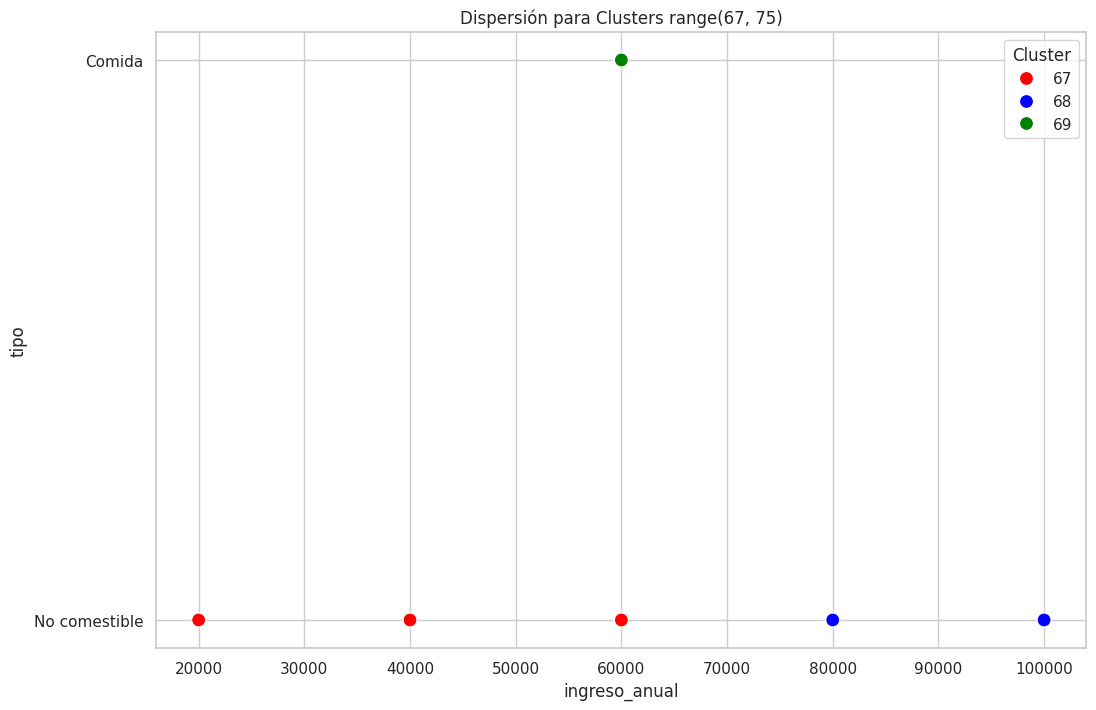

In [65]:
variables_a_comparar = ['ingreso_anual', 'tipo']
clusters_seleccionados = range(67, 75)

plot_clusters(datos_raw, variables_a_comparar, clusters_seleccionados)

* Ingreso Anual vs. Tipo:

* Cluster 67 (Rojo): Este clúster se caracteriza por la compra de productos no comestibles, y por tener ingresos bajos-medios, discriminando de esta manera a los alimentos y bebidas.
* Cluster 68 (Azul): Este clúster se caracteriza por la compra de productos comestibles, y por tener ingresos intermedios, discriminando de esta manera a los productos no comestibles.
* Cluster 69 (Verde): Este clúster se caracteriza por la compra de productos no comestibles, y por tener ingresos altos (productos de mayor costo), discriminando de esta manera a los alimentos y bebidas.

En este caso en particular se observa una mejor resultado para el clúster 69, los valores son equilibrados, pero que tiene una fuerte inclinación o interés hacia los productos comestibles. El resto de los clúster poseen características de recuersos económicos medios-bajos e interés sólo por los productos no comestibles.

<ipython-input-62-be3fd4db0511>:11: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x=variables[0], y=variables[1], hue='cluster', palette=colores_clusters, data=cluster_data, s=100)


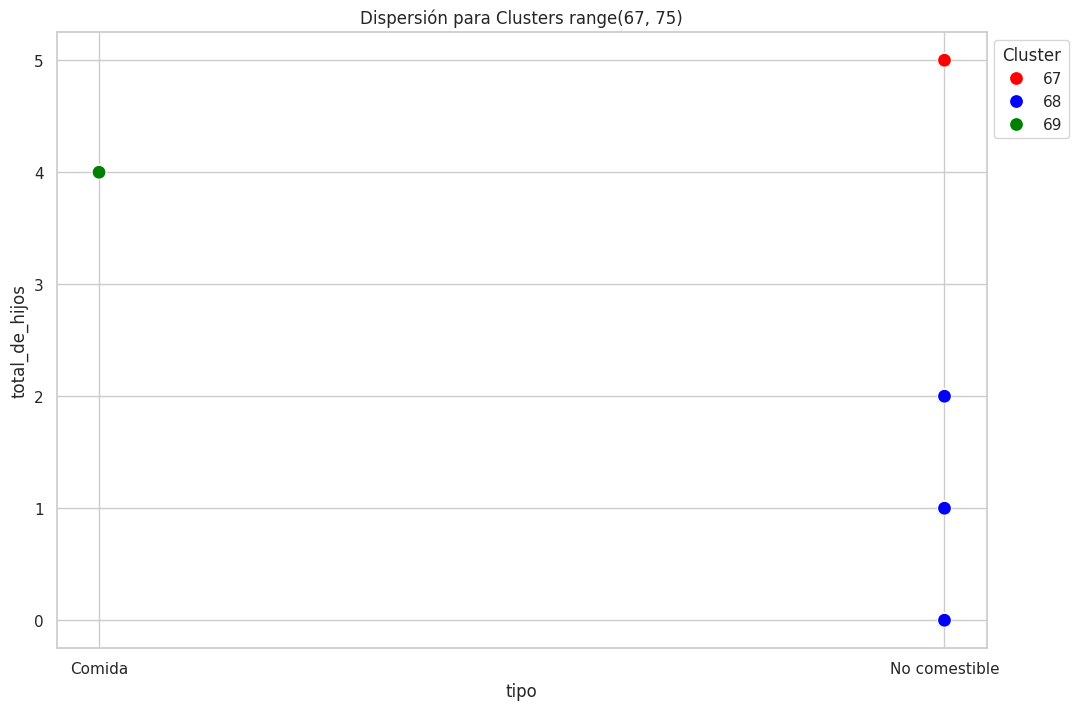

In [66]:
variables_a_comparar = ['tipo', 'total_de_hijos']
clusters_seleccionados = range(67, 75)

plot_clusters(datos_raw, variables_a_comparar, clusters_seleccionados)

* Total de hijos vs. Tipo:

* Cluster 67 (Rojo): Este clúster se caracteriza por la compra de productos no comestibles, y por tener mayor número de hijos declarados.
* Cluster 68 (Azul): Este clúster se caracteriza por la compra de productos no omestibles, y por tener cantidad de hijos medio a bajo.
* Cluster 69 (Verde): Este clúster se caracteriza por la compra de productos comestibles, y por tener número de hijos de medio a alto.

En este caso en particular se observa una mejor resultado para el clúster 69, porque los clientes tienen un fuerte interés por los productos comestibles y con un número significativo de hijos que hacen uso de las tiendas en custión.El resto de clúster tienen inclinación por los productos no comestibles, que son productos que son de interés especialmente en temporadas específicas.

**El siguiente código genera una tabla de contingencia entre dos columnas específicas de un DataFrame y le aplica un estilo visual con un gradiente de color basado en una paleta de tonos de verde.**

El análisis se hará para el rango de clúster entre 67 y 71.

In [67]:
def mapa_calor(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [68]:
mapa_calor(datos_raw, ['ingreso_anual', 'cluster'], normalize=False, values=None, aggfunc=None)

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
ingreso_anual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000,0,0,0,0,0,0,606,0,842,211,0,0,306,0,39,0,0,0,359,0,0,319,0,262,474,0,0,0,523,0,760,197,0,0,0,848,0,0,351,81,0,0,0,0,373,0,0,0,0,1095,0,0,117,0,0,0,0,0,234,1027,354,1020,1159,435,0,0,859,108,0,0
40000,0,1324,0,0,0,1225,548,0,0,299,342,0,411,0,281,675,0,0,493,0,0,969,0,408,738,1502,0,1549,0,0,1561,248,0,0,0,0,1459,0,330,258,0,0,1282,0,586,0,0,0,0,0,0,1181,313,0,0,398,0,0,423,0,520,0,0,0,0,0,0,191,0,0
60000,0,0,752,299,179,0,367,0,0,0,373,405,237,0,158,392,698,675,294,0,0,264,925,0,0,0,0,0,0,0,0,0,248,0,361,0,0,0,97,58,0,0,0,0,0,149,0,882,0,0,0,0,119,0,0,194,0,0,0,0,0,0,0,0,794,644,0,111,0,818
80000,0,0,581,200,166,0,0,0,0,0,137,306,0,0,173,0,626,771,0,0,0,0,487,0,0,0,0,0,0,0,0,0,210,0,300,0,0,0,0,0,0,0,0,0,0,105,0,686,0,0,0,0,32,0,981,155,308,0,0,0,0,0,0,0,498,479,0,0,343,0
100000,0,0,0,60,48,0,0,453,0,0,0,128,0,0,64,0,180,300,0,0,114,0,0,0,0,0,0,0,0,0,0,0,55,0,71,0,0,0,0,0,0,131,0,108,0,37,32,0,0,0,0,0,0,0,108,0,64,625,0,0,0,0,0,0,0,0,0,0,159,0
120000,87,0,0,0,0,0,0,301,0,0,0,0,0,0,0,0,0,0,0,146,126,0,0,0,0,0,129,0,0,0,0,0,0,81,0,0,0,323,0,0,405,279,0,218,0,0,49,0,152,0,94,0,0,66,0,0,0,134,0,0,0,0,0,0,0,0,0,0,0,0
140000,190,0,0,0,0,0,0,0,0,0,0,0,0,138,0,0,0,0,0,176,193,0,0,0,0,0,191,0,0,562,0,0,0,104,0,0,0,266,0,0,340,0,0,355,0,0,88,0,140,0,585,0,0,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160000,27,0,0,0,0,0,0,0,0,0,0,0,0,188,0,0,0,0,0,91,33,0,0,0,0,0,57,0,0,192,0,0,0,41,0,0,0,32,0,0,149,0,0,78,0,0,15,0,56,0,180,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


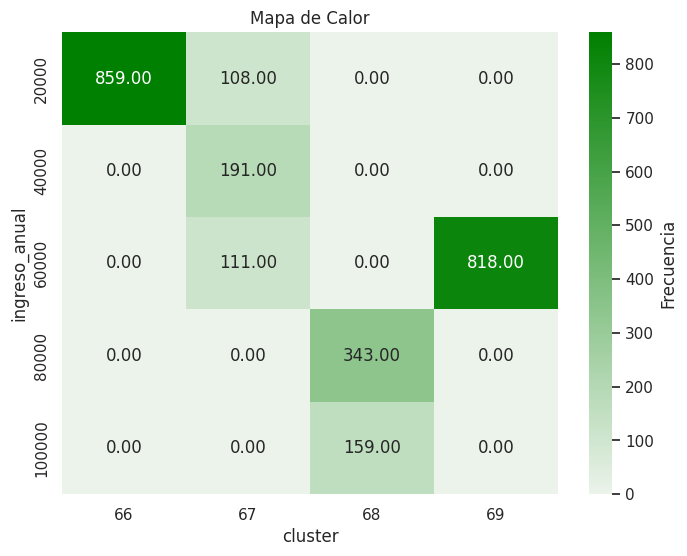

In [69]:
def mapa_calor(df, cols, normalize=False, values=None, aggfunc=None, cluster_range=None):
    temp = cols

    # Filtrar el DataFrame para incluir solo los clusters en el rango especificado
    df_filtered = df[df['cluster'].between(cluster_range[0], cluster_range[1])]

    # Crear el mapa de calor
    cm = sns.light_palette("green", as_cmap=True)
    heatmap_data = pd.crosstab(df_filtered[temp[0]], df_filtered[temp[1]], normalize=normalize, values=values, aggfunc=aggfunc)

    # Crear la leyenda
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap=cm, annot=True, fmt=".2f", cbar_kws={'label': 'Frecuencia'})
    plt.title("Mapa de Calor")
    plt.show()

# Ejemplo de uso limitando a clusters del rango 67 al 71
mapa_calor(datos_raw, ['ingreso_anual', 'cluster'], normalize=False, values=None, aggfunc=None, cluster_range=(66, 71))





In [70]:
mapa_calor(datos_raw, ['total_de_hijos', 'cluster'], normalize=False, values=None, aggfunc=None)

TypeError: 'NoneType' object is not subscriptable

En los Clúster del 66 al 69 están más ordenados

In [ ]:
mapa_calor(datos_raw, ['genero', 'cluster'], normalize=False, values=None, aggfunc=None)

In [ ]:
# Filtrar datos para incluir solo los clusters 67 al 71
clusters_67_71 = datos_raw[datos_raw['cluster'].between(67, 71)]

# Crear tabla de contingencia
contingencia_ingreso_cluster = pd.crosstab(clusters_67_71['ingreso_anual'], clusters_67_71['cluster'], normalize='index') * 100

# Graficar porcentaje de ingreso anual por cluster
plt.figure(figsize=(12, 6))
sns.heatmap(contingencia_ingreso_cluster, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Porcentaje'})
plt.title('Porcentaje de Ingreso Anual por Cluster (67 al 71)')
plt.xlabel('Cluster')
plt.ylabel('Ingreso Anual')
plt.show()


En el clúster 69, se tiene un porcentaje de ingreso más homogéneo

In [ ]:
# Filtrar datos para incluir solo los clusters 67 al 71
clusters_67_71 = datos_raw[datos_raw['cluster'].between(67, 71)]

# Crear tabla de contingencia
contingencia_ingreso_cluster = pd.crosstab(clusters_67_71['ingreso_anual'], clusters_67_71['cluster'], normalize='index') * 100

# Graficar porcentaje de ingreso anual por cluster (gráfico de barras apiladas)
contingencia_ingreso_cluster.plot(kind='bar', stacked=True, colormap='YlGnBu', figsize=(12, 6))

plt.title('Porcentaje de Ingreso Anual por Cluster (67 al 71)')
plt.xlabel('Ingreso Anual')
plt.ylabel('Porcentaje')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
def plot_porcentajes(variables, datos):
  plt.figure(figsize=(16,8))
  grafico = sns.countplot(x=variables, data=datos, orient='h')
  grafico.set_ylabel('Conteo', fontsize=17)

  sizes = []

  for p in grafico.patches:
    height = p.get_height()
    sizes.append(height)
    grafico.text(p.get_x() + p.get_width()/1.6, height + 200, f'{round(height/len(datos)*100,2)}%', ha='center', va='bottom', fontsize=12)
    grafico.set_ylim(0,max(sizes)*1.1)

### Porcentaje de ingreso anual

In [ ]:
plot_porcentajes('ingreso_anual', datos_raw)

El mayor porcentaje de ingreso anual se encuentra entre el rango de 20000 a 80000

### Porcentaje para el Tipo de Producto más comercial

In [ ]:
plot_porcentajes('tipo', datos_raw)

La comida es el producto más comercializado

### Porcentaje por Género

In [ ]:
plot_porcentajes('genero', datos_raw)

En el caso del género femenino, es el que posee un poco más de interés en este tipo de productos comercializados por estas empresas distribuidoras.

# Resumen (sobre el primer análisis):

La segmentación podría ser más específica, un ejemplo podría ser:

* demografica_df = ['escolaridad', 'estado_civil', 'genero', 'ingreso_anual', 'numero_hijos']
* productos_preferencia_colum_df = ['categoria_alimento', 'tipo']
* geografica_colum_df = ['ciudad', 'estado']
* lealtad_colum_df = ['miembro']
* espacio_area_colum_df = ['pies_cuadrados_tienda', 'pies_cuadrados_comestibles', 'pies_cuadrados_congelados', 'pies_cuadrados_carne']
* comportamiento_compra_df = ['ocupacion', 'costo', 'ventas_tienda(en millones)']

Los resultados obtenidos para los clúster 67 y 69, son los más estables y presentan métricas dentro de los parámetros deseados.

En las gráficas de dispersión de clúster, se observa el comportamiento actual de las personas según su interés en los productos ofrecidos, en función de del ligero análisis para el tipo, ingreso anual y total de hijos. Para estas variables seleccionadas los clúster tuvieron una separación adecuada, sin solapamientos, y estabilidad dentro del 5%.

* Se podría encontrar una experiencia del cliente más efectiva, para el género femenino, con mayor número de hijos para personas con ingresos intermedios alrededor de los $60000, para los productos comestibles.

* El género masculino, posee los ingreso más altos, y se identifica más con los productos no comestibles. Posee una frecuencia de compra promedio, por lo que es posible que no exista en estas distribuidoras productos más llamativos clasificados por edad o es posible que estén mal distribuidos geográficamente.

A partir de estos resultados, es posible hacer una nueva segmentación en base al análisis actual para encontrar resultados en cuanto a la geografía, comportamiento de compra, selección demográfica y productos de preferencia. Estos análisis deberán ser realizados independientemente, para evitar el solapamiento de clúster y así garantizar resultados homogéneos.

# Fin del análisis preliminar (19/01/2024)